## Модель бинарной классификации для предсказания вероятности клика (CTR) на рекламное объявление

<a id='1-bullet'></a>

_____
**Описание исследования**

Рекламная платформа сталкивается с проблемой неэффективного расходования бюджета из-за искаженных оценок вероятности клика (CTR). Поскольку алгоритмы автоматических ставок опираются на точные вероятности, любые отклонения предсказаний от реального поведения пользователей приводят к финансовым потерям. Нужно построить модель бинарной классификации для прогнозирования CTR с обязательным этапом калибровки, что позволит привести предсказанные вероятности в соответствие с фактической частотой кликов и оптимизировать стратегии закупок рекламы.
_____
**Цель исследования**

- Построить модель бинарной классификации для прогнозирования CTR.
- Целевая переменная: click (бинарный признак, указывающий, был ли совершён клик по баннеру).
- В качестве метрики будет использоваться: Precision-Recall AUC (основная метрика для несбалансированных данных). Log Loss для оценки точности предсказанных вероятностей. Оценка Бриера для измерения и точности, и калибровки модели.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели.
_____
**Задачи исследования**

- Изучение данных и предобработка.
- Отбор признаков.
- Обучение базовых моделей классификации.
- Калибровка вероятностей.
- Оценка и анализ результатов.
- Подготовка артефактов.

_____
**Исходные данные**

Идентификаторы и временные метки:
- id - уникальный идентификатор записи о показе баннера;
- hour - час, в который был показан баннер, в формате YYMMDDHH.

Характеристики рекламной площадки ( Site ):
- site_id - идентификатор веб-сайта, на котором был показан баннер;
- site_domain - домен веб-сайта;
- site_category - тематическая категория веб-сайта.

Характеристики рекламируемого приложения ( App ):
- app_id - идентификатор рекламируемого мобильного приложения;
- app_domain - домен рекламируемого приложения;
- app_category - категория рекламируемого приложения.

Характеристики устройства и соединения пользователя:
- device_id - идентификатор браузера или устройства;
- device_ip - IP-адрес устройства;
- device_model - модель устройства;
- device_type - тип устройства пользователя: например, смартфон, планшет, ПК;
- device_conn_type - тип сетевого соединения устройства: например, Wi-Fi, 3G, 4G.

Характеристики рекламного баннера и аукциона:
- banner_pos - позиция баннера на веб-странице;
- C1 - анонимизированный признак, характеризующий контекст показа;
- C14 - C21 - группа анонимизированных признаков, описывающих параметры баннера, пользователя или аукциона.

Машинно-сгенерированные признаки (ML Features):
- ml_feature_1, ml_feature_3 - ml_feature_6, ml_feature_8 - ml_feature_10 - числовые признаки, полученные в результате предварительной обработки и генерации новых признаков;
- ml_feature_2, ml_feature_7 - категориальные признаки, полученные в результате предварительной обработки и генерации новых признаков.

Целевая переменная:
- click - бинарный признак, указывающий, был ли совершён клик по баннеру. 1 - клик был, 0 - клика не было.
______

**Данное исследование разделим на несколько частей**

***Часть 0. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 1. Подготовка среды и загрузка данных***
* [1. Загрузка и импорт библиотек](#2-bullet)
* [2. Извлечение данных из датасета](#3-bullet)
* [3. Фиксация глобальных констант](#4-bullet)
* [4. Загрузка данных](#5-bullet)
* [5. Понижение размерности pandas датасета](#6-bullet)

***Часть 2. Исследовательский анализ данных (EDA)***
* [1. Описание базовой информации о датасете](#7-bullet)
* [2. Анализ целевой переменной](#8-bullet)
* [3. Анализ признаков](#9-bullet)
* [4. Анализ пропущенных значений](#10-bullet)
* [5. Анализ категориальных признаков](#11-bullet)
* [6. Анализ выбросов и распределений](#12-bullet)
* [7. Выводы по EDA](#13-bullet)

***Часть 3. Разделение данных на выборки***
* [1. Разделение данных](#14-bullet)
* [2. Проверка разделения](#15-bullet)

***Часть 4. Предобработка данных - построение пайплайнов***
* [1. Объединение пайплайнов для предобработки данных](#16-bullet)

***Часть 5. Отбор признаков***
* [1. Отбор признаков](#17-bullet)

***Часть 6. Обучение базовой модели***
* [1. Обучение базовой модели](#18-bullet)
* [2. Обучение `DummyClassifier`](#19-bullet)
* [3. Обучение `LogisticRegression`](#20-bullet)
* [4. Обучение `SVC`](#21-bullet)
* [5. Сравнение моделей](#22-bullet)

***Часть 7. Подбор гиперпараметров: Grid Search с кросс-валидацией***
* [1. Определение сетки гиперпараметров](#23-bullet)
* [2. Применение Grid Search](#24-bullet)
* [3. Таблица результатов](#25-bullet)

***Часть 8. Финальная модель***
* [1. Обучение финальной модели](#26-bullet)
* [2. Посчет метрики на тестовой выборке](#27-bullet)
* [3. Анализ весов модели](#28-bullet)

***Часть 9. Калибровка модели***
* [1. Проверка текущей калибровки](#29-bullet)
* [2. Применение метода калибровки](#30-bullet)

***Часть 10. Оценка качества калибровки***
* [1. Сравнение модели до и после калибровки](#31-bullet)

***Часть 11. Финальный отчёт и выводы***
* [1. Сведение результатов в таблицу](#32-bullet)
* [2. Выводы](#33-bullet)
* [3. Рекомендации](#34-bullet)

***Часть 12. Сохранение модели для продакшена***
* [1. Сохранение артефактов](#35-bullet)
* [2. Проверка работоспособности кода](#36-bullet)

# Структура проекта

## 1. Подготовка среды и загрузка данных

#### 1.1 Подготовка библиотек

Установка библиотек

<a id='2-bullet'></a>

In [1]:
from pathlib import Path

req_path = Path("../../requirements.txt")
if req_path.exists():
    %pip install -qr {req_path}
else:
    %pip install -qU scikit-learn numpy pandas matplotlib seaborn phik jinja2 joblib category_encoders

Note: you may need to restart the kernel to use updated packages.


Импорт библиотек

<a id='3-bullet'></a>

In [2]:
import joblib
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from category_encoders import TargetEncoder

import sklearn
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_predict, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFE
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import average_precision_score, brier_score_loss, precision_recall_curve, classification_report, confusion_matrix
from sklearn.calibration import calibration_curve, CalibrationDisplay, CalibratedClassifierCV

from IPython.display import display

pd.set_option('display.max_columns', None)

#### 1.2 Фиксация констант для воспроизводимости

<a id='4-bullet'></a>

In [3]:
RANDOM_SEED=42

#### 1.3 Загрузка данных

<a id='5-bullet'></a>

In [4]:
pth1 = Path('click_dataset.csv')
pth2 = Path('/datasets/ds_s16_ad_click_dataset.csv')

if pth1.exists():
    original_df = pd.read_csv(pth1, sep=',', decimal='.')
elif pth2.exists():
    original_df = pd.read_csv(pth2, sep=',', decimal='.')
else:
    raise "Путь до датасета неверный"

In [5]:
original_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_2,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1.005263e+19,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,488a9a3e,31025cda,1,0,17614,320,50,1993,2,1063,-1,33,-0.996823,A,0.666588,0,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,1.010597e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,75bb1b58,2ee63ff8,1,0,15701,320,50,1722,0,35,-1,79,-0.391309,C,5.146789,1,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,1.012048e+19,0,14102100,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285263b0,d780319b,1,0,17914,320,50,2043,2,39,100084,32,-2.112732,D,7.169348,0,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,1.021995e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39cfef32,d9b5648e,0f2161f8,a99f214a,18190986,f4fffcd0,1,0,21611,320,50,2480,3,297,100111,61,0.332707,A,-0.290708,1,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,1.023455e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b66e5482,a0f5f879,1,0,15702,320,50,1722,0,35,100084,79,1.166623,A,6.319134,1,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  float64
 1   click             50000 non-null  int64  
 2   hour              50000 non-null  int64  
 3   C1                50000 non-null  int64  
 4   banner_pos        50000 non-null  int64  
 5   site_id           50000 non-null  object 
 6   site_domain       50000 non-null  object 
 7   site_category     50000 non-null  object 
 8   app_id            50000 non-null  object 
 9   app_domain        50000 non-null  object 
 10  app_category      50000 non-null  object 
 11  device_id         50000 non-null  object 
 12  device_ip         50000 non-null  object 
 13  device_model      50000 non-null  object 
 14  device_type       50000 non-null  int64  
 15  device_conn_type  50000 non-null  int64  
 16  C14               50000 non-null  int64 

#### 1.4 Понижение размерности pandas датасета

<a id='6-bullet'></a>

In [7]:
for column in [
    'id',
    'ml_feature_1',
    'ml_feature_3',
    'ml_feature_5',
    'ml_feature_6',
    'ml_feature_8',
    'ml_feature_9',
    'ml_feature_10'
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='float')
    
for column in [
    'click',
    'hour',
    'C1',
    'banner_pos',
    'device_type',
    'device_conn_type',
    'C14',
    'C15',
    'C16',
    'C17',
    'C18',
    'C19',
    'C20',
    'C21',
    'ml_feature_4',
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='integer')

## 2. Исследовательский анализ данных (EDA)

#### 2.1 Описание базовой информации о датасете

<a id='7-bullet'></a>

In [8]:
print("Число признаков:", original_df.shape[1])
print("Число объектов:", original_df.shape[0])

Число признаков: 34
Число объектов: 50000


Датасет содержит больше числовых признаков - 23. Категорильных - 11. 
- float: 8 
- int: 15
- object: 11

Данные представляют собой готовую аналитическую витрину событий показа рекламы, собранную из логов системы.
- О пользователях: известны технические характеристики их устройств (модель, тип, вид соединения, IP-адрес) и анонимизированные идентификаторы.

- О рекламе: доступна информация о площадке размещения (сайт или приложение, их домены и категории), позиции баннера, времени показа, а также набор анонимных параметров аукциона.


#### 2.2 Анализ целевой переменной

<a id='8-bullet'></a>

In [9]:
click_desc = original_df['click'].describe()

click_desc

count    50000.000000
mean         0.172060
std          0.377436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: click, dtype: float64

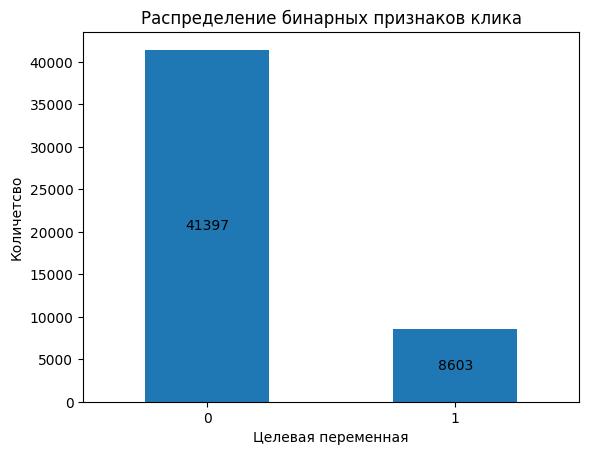

In [10]:
click_counts = original_df['click'].value_counts()

ax = click_counts.plot(
    kind='bar',
    title='Распределение бинарных признаков клика',
    xlabel='Целевая переменная',
    ylabel='Количетсво',
    rot=0
)

ax.bar_label(ax.containers[0], label_type='center')

plt.show()

In [11]:
print(f'Клика не было: {click_counts[0] / click_desc['count'] * 100:.0f}%')
print(f'Клик был: {click_counts[1] / click_desc['count'] * 100:.0f}%')

Клика не было: 83%
Клик был: 17%


В данных наблюдается сильный дисбаланс классов: 83% наблюдений относятся к классу без клика и только 6% - к классу с кликом по рекламе.

#### 2.3 Анализ признаков

<a id='9-bullet'></a>

In [12]:
temp_len = len(original_df)

In [13]:
original_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_2,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1.005263e+19,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,488a9a3e,31025cda,1,0,17614,320,50,1993,2,1063,-1,33,-0.996823,A,0.666588,0,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,1.010597e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,75bb1b58,2ee63ff8,1,0,15701,320,50,1722,0,35,-1,79,-0.391309,C,5.146790,1,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,1.012048e+19,0,14102100,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285263b0,d780319b,1,0,17914,320,50,2043,2,39,100084,32,-2.112732,D,7.169348,0,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,1.021995e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39cfef32,d9b5648e,0f2161f8,a99f214a,18190986,f4fffcd0,1,0,21611,320,50,2480,3,297,100111,61,0.332707,A,-0.290708,1,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,1.023455e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b66e5482,a0f5f879,1,0,15702,320,50,1722,0,35,100084,79,1.166623,A,6.319133,1,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


In [14]:
print('site_id:', original_df['site_id'].nunique())
print('site_domain:', original_df['site_domain'].nunique())

top_site_domains = original_df['site_domain'].value_counts().nlargest(100).index
original_df['site_domain_reduced'] = original_df['site_domain'].where(original_df['site_domain'].isin(top_site_domains), 'other')
coverage = original_df['site_domain'].isin(top_site_domains).mean()
print(f"Топ-100 site_domain покрывают {coverage:.1%} всех данных")

top_site_ids = original_df['site_id'].value_counts().nlargest(100).index
original_df['site_id_reduced'] = original_df['site_id'].where(original_df['site_id'].isin(top_site_ids), 'other')
coverage = original_df['site_id'].isin(top_site_ids).mean()
print(f"Топ-100 site_id покрывают {coverage:.1%} всех данных")

display(original_df[['site_id_reduced', 'site_domain_reduced']].phik_matrix(njobs=4))

print('app_id:', original_df['app_id'].nunique())
print('app_domain:', original_df['app_domain'].nunique())

top_app_ids = original_df['app_id'].value_counts().nlargest(100).index
original_df['app_id_reduced'] = original_df['app_id'].where(original_df['app_id'].isin(top_app_ids), 'other')
coverage = original_df['app_id'].isin(top_app_ids).mean()
print(f"Топ-100 app_id покрывают {coverage:.1%} всех данных")

display(original_df[['app_id_reduced', 'app_domain']].phik_matrix(njobs=4))

original_df = original_df.drop(columns=['app_id_reduced', 'site_domain_reduced', 'site_id_reduced'])

print('device_id:', original_df['device_id'].nunique())
print('device_ip:', original_df['device_ip'].nunique())

site_id: 1160
site_domain: 1013
Топ-100 site_domain покрывают 93.8% всех данных
Топ-100 site_id покрывают 91.0% всех данных


,site_id_reduced,site_domain_reduced
site_id_reduced,1.000000,0.999871
site_domain_reduced,0.999871,1.000000


app_id: 976
app_domain: 67
Топ-100 app_id покрывают 94.8% всех данных


,app_id_reduced,app_domain
app_id_reduced,1.000000,0.985105
app_domain,0.985105,1.000000


device_id: 8580
device_ip: 41455


Признаки, которые стоит удалить: 
1. Идентификаторы
- id - технический идентификатор. Удаляем, чтобы избежать переобучения.
2. Мультиколлинеарность
- site_domain (удаляем), оставляем site_id.
- app_domain (удаляем), оставляем app_id.

    Анализ корреляций показал почти идеальную зависимость (phik ~1.0) для двух пар. Это значит, что признаки дублируют друг друга. Оставляем только site_id и app_id как более детальные признаки.

3. Кардинальность
- device_id и device_ip - признаки с очень высокой кардинальностью (тысячи уникальных значений). Могут раздуть размерность модели и вызвать переобучение. 

Остальная фильтрация признаков будет на этапе просмотра корреляций.

In [15]:
df = original_df.copy()

useless_cols = ['id', 'site_domain', 'app_domain', 'device_id', 'device_ip']
df = df.drop(columns=useless_cols)

---

Удаление явных дубликатов

In [16]:
print('Число явных дубликатов:', df.duplicated().sum())

df = df.drop_duplicates()

Число явных дубликатов: 0


---

Создание копии датасета для EDA анализа

In [17]:
df_eda = df.copy()

---

Признак, требующий переработки: hour.

Формат YYMMDDHH модель воспримет как простое нарастающее число. Чтобы признак стал полезным, из него нужно выделить циклические составляющие. Например: час дня и день недели.

In [18]:
df_eda['datetime'] = pd.to_datetime(df_eda['hour'], format='%y%m%d%H')
h = df_eda['datetime'].dt.hour

df_eda['is_night'] = (h < 6).astype(int)
df_eda['is_morning'] = ((h >= 6) & (h < 12)).astype(int)
df_eda['is_day'] = ((h >= 12) & (h < 18)).astype(int)

df_eda = df_eda.drop(columns=['hour', 'datetime'])
print(df_eda[['is_night', 'is_morning', 'is_day']].head())

   is_night  is_morning  is_day
0         1           0       0
1         1           0       0
2         1           0       0
3         1           0       0
4         1           0       0


#### 2.4 Анализ пропущенных значений

<a id='10-bullet'></a>

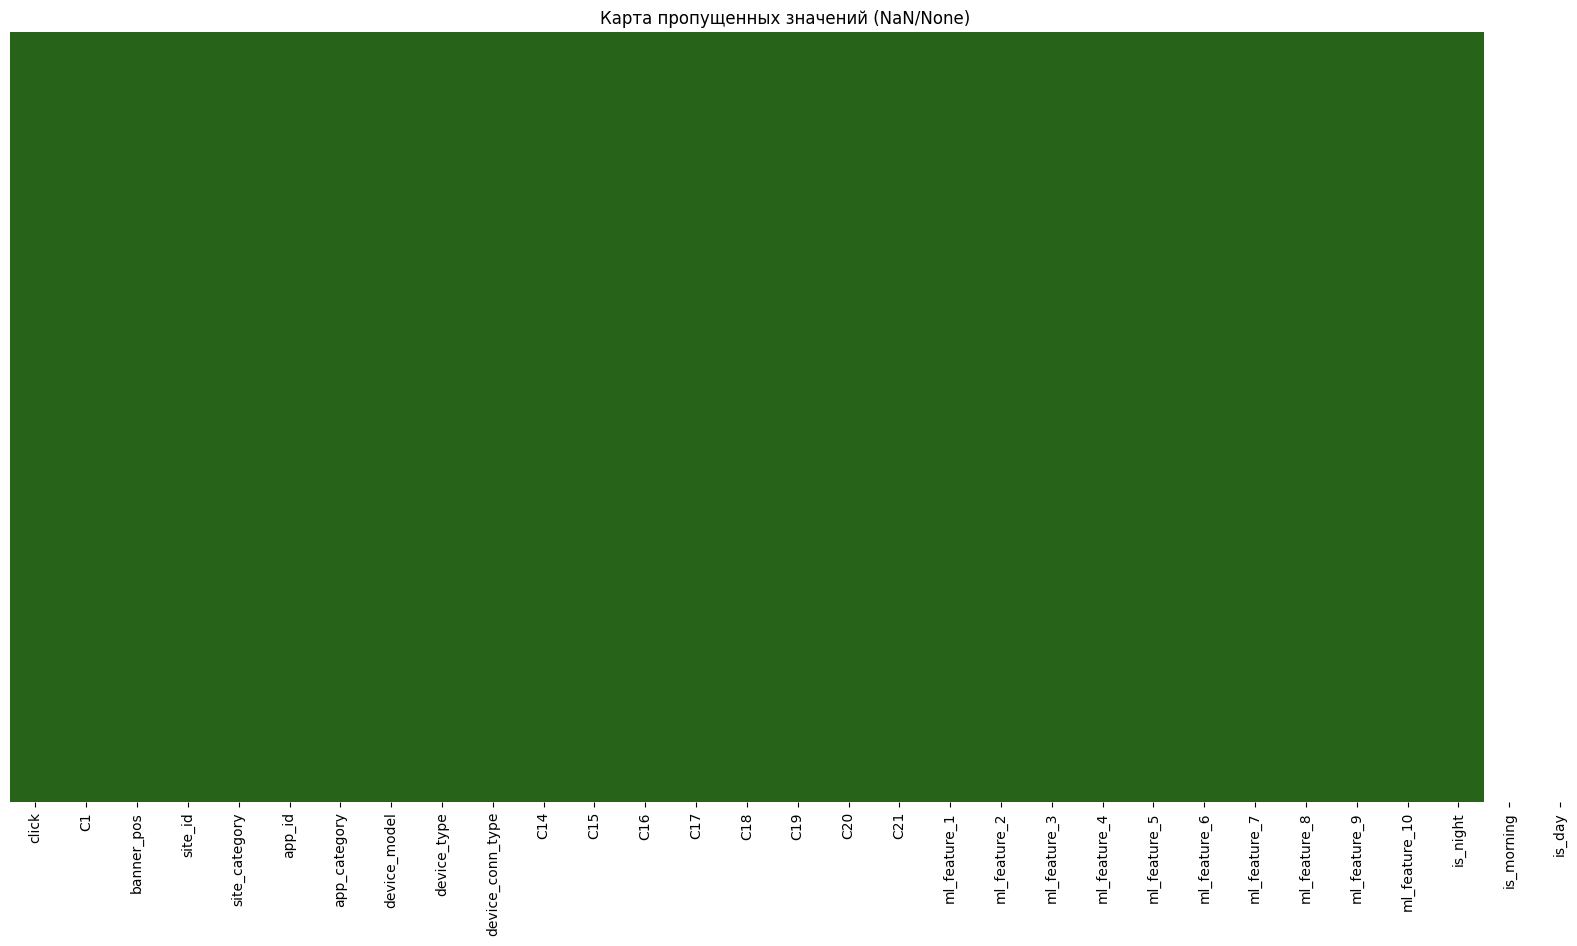

In [19]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.isna().astype(int), yticklabels=False, cbar=False, cmap='PiYG_r', xticklabels=df_eda.columns)

plt.title("Карта пропущенных значений (NaN/None)")
plt.show()

Обработка пропущенных значений

In [20]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

show_missing_stats(df_eda)

'Пропусков в данных нет'

Пропусков в данных нет, заполнение не требуется.

#### 2.5 Анализ категориальных признаков

<a id='11-bullet'></a>

In [21]:
def check_cat_features(df):
    cat_df = df.select_dtypes(include=['object'])
    
    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df[col].unique(),
            'Кол-во': df[col].nunique(),
        })
        
    return pd.DataFrame(data)

check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,site_id,"[d9750ee7, 1fbe01fe, 85f751fd, 543a539e, e59ef...",1160
1,site_category,"[f028772b, 28905ebd, 50e219e0, 3e814130, 335d2...",18
2,app_id,"[ecad2386, 39cfef32, fbbccc58, 5e3f096f, cf032...",976
3,app_category,"[07d7df22, 0f2161f8, cef3e649, f95efa07, 8ded1...",22
4,device_model,"[31025cda, 2ee63ff8, d780319b, f4fffcd0, a0f5f...",2521
5,ml_feature_2,"[A, C, D, B, E]",5
6,ml_feature_7,"[Z, X, Y]",3


По результатам анализа категориальных признаков, кодирование через One-Hot Encoding будет только у признаков: ml_feature_2 и ml_feature_7, так как кол-во их уникальных значений <10. Остальные признаки будут кодироваться через Target Encoding.

#### 2.6 Анализ выбросов и распределений

<a id='12-bullet'></a>

In [22]:
df_eda.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,ml_feature_1,ml_feature_3,ml_feature_4,ml_feature_5,ml_feature_6,ml_feature_8,ml_feature_9,ml_feature_10,is_night,is_morning,is_day
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.172060,1004.970060,0.291380,1.018120,0.337160,18826.648680,318.86640,59.692480,2109.781020,1.428100,227.703800,53173.383240,83.685180,-0.002445,-0.036381,0.498040,0.034729,0.022948,0.025465,0.035361,0.020226,0.207940,0.302400,0.321540
std,0.377436,1.110202,0.514201,0.538477,0.860057,4983.064178,20.56153,46.720842,612.963141,1.327413,351.592108,49960.181871,70.539513,1.000280,5.792335,0.500001,1.002116,0.656690,0.578026,0.505034,0.303309,0.405838,0.459302,0.467072
min,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.00000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,-4.631262,-9.999742,0.000000,-4.631853,-1.000000,-0.999965,-2.147526,-1.287965,0.000000,0.000000,0.000000
25%,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.00000,50.000000,1823.000000,0.000000,35.000000,-1.000000,23.000000,-0.677784,-5.059555,0.000000,-0.639829,-0.579775,-0.470627,-0.304077,-0.182386,0.000000,0.000000,0.000000
50%,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.00000,50.000000,2323.000000,2.000000,39.000000,100049.000000,61.000000,-0.003776,-0.056155,0.000000,0.028112,0.037786,0.027348,0.035985,0.018930,0.000000,0.000000,0.000000
75%,0.000000,1005.000000,1.000000,1.000000,0.000000,21916.000000,320.00000,50.000000,2526.000000,3.000000,171.000000,100094.000000,108.000000,0.673534,4.985939,1.000000,0.707594,0.637131,0.521117,0.374152,0.224080,0.000000,1.000000,1.000000
max,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.00000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,3.793828,9.999975,1.000000,4.230623,1.000000,1.119858,2.120786,1.202300,1.000000,1.000000,1.000000


In [23]:
large_discrete_cols = ['C19', 'C20', 'C21']
discrete_cols = ['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C18', 'C15', 'C16', 'ml_feature_4', 'is_night', 'is_morning', 'is_day', *large_discrete_cols]

def get_df_without_discrete(df, discrete_cols):
    for col in discrete_cols:
        if col in df.columns:
            df = df.drop(columns=col)

    return df

In [24]:
def create_df_boxplot(df, col=None, ax=None):
    data = df if col is None else df[col]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 8))
        standalone = True
    else:
        standalone = False
    
    sns.boxplot(data=data, ax=ax)
    
    title = 'Размах значений признака'
    if col is not None:
        title += f': {col}'

    ax.set_title(title)
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    if standalone:
        return plt.show()

    return ax

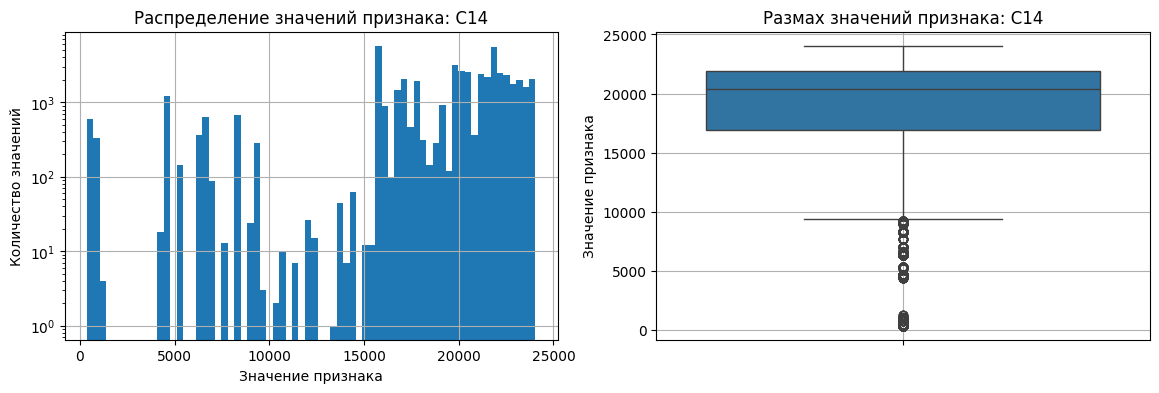

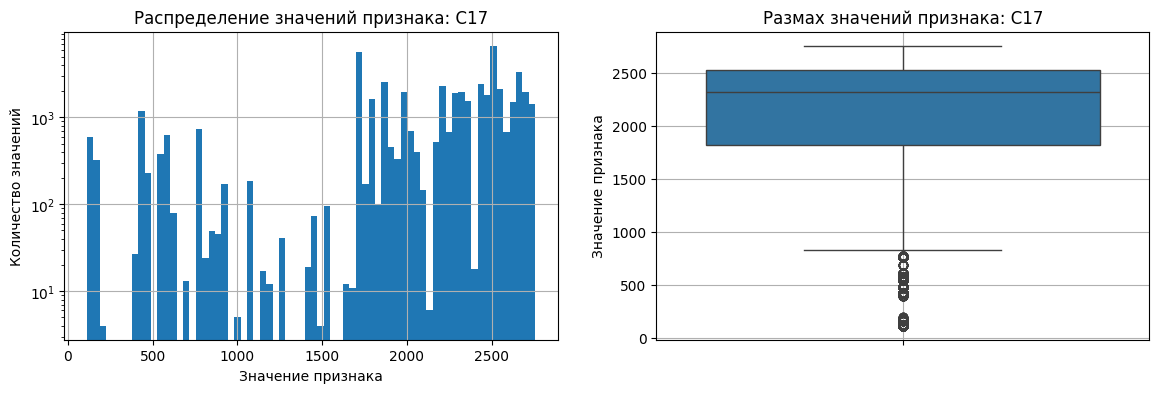

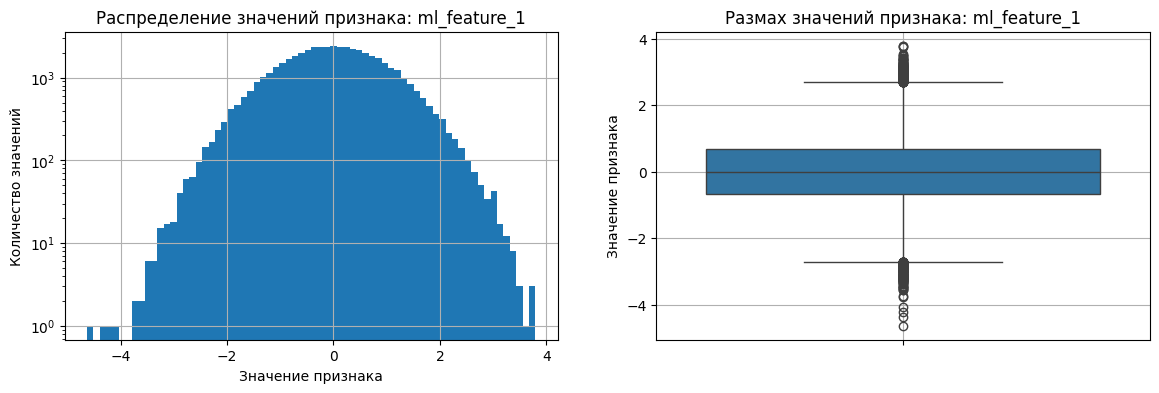

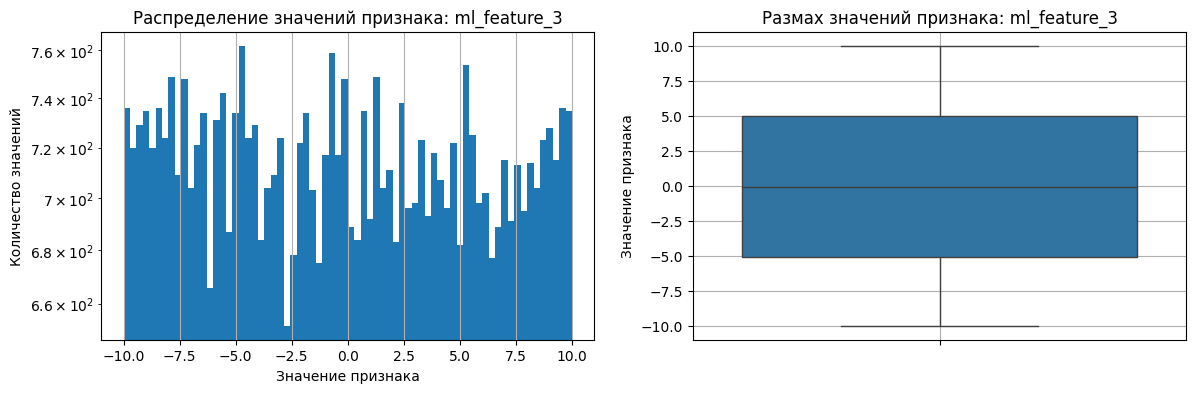

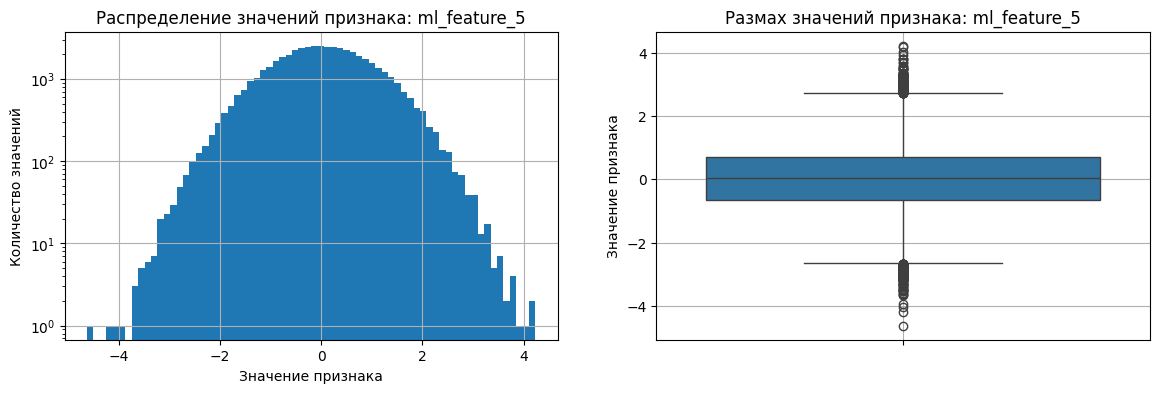

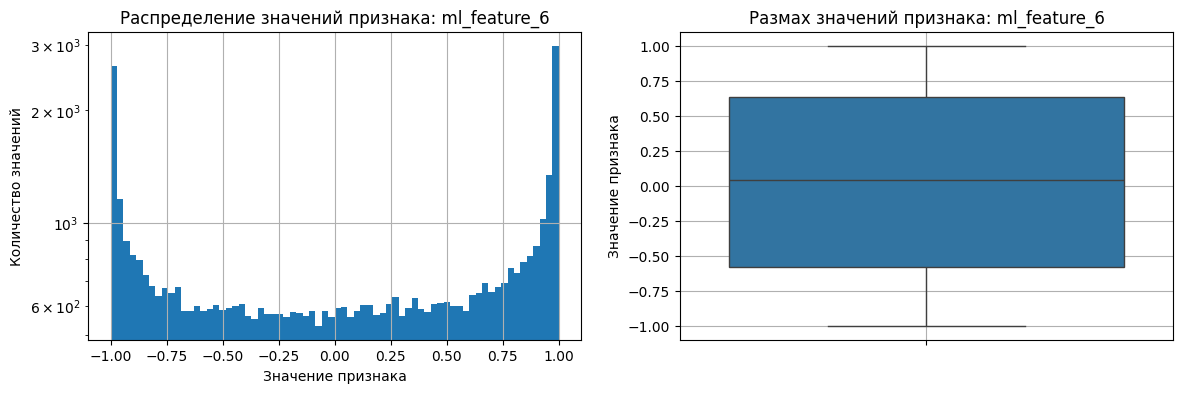

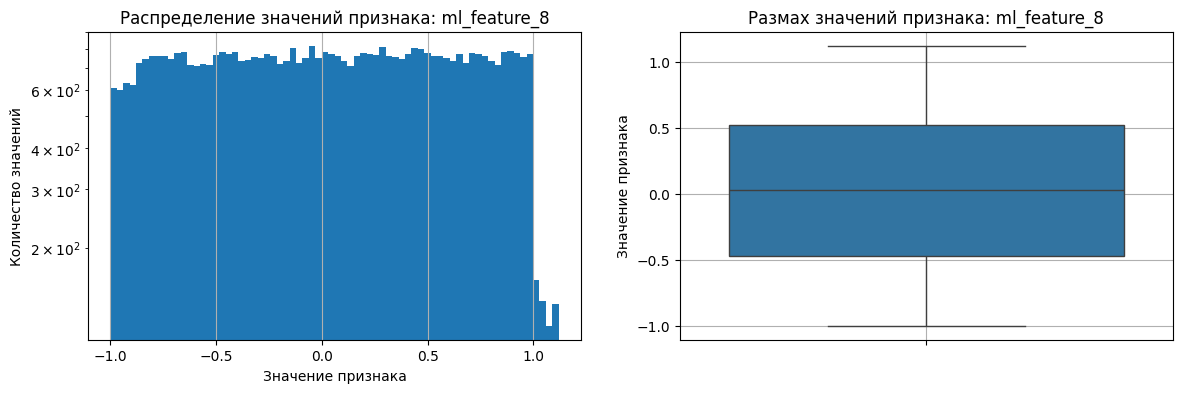

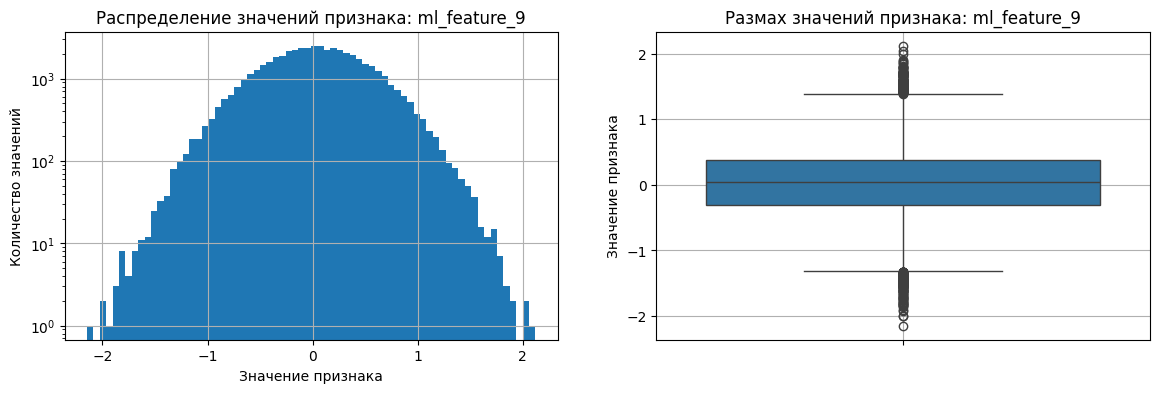

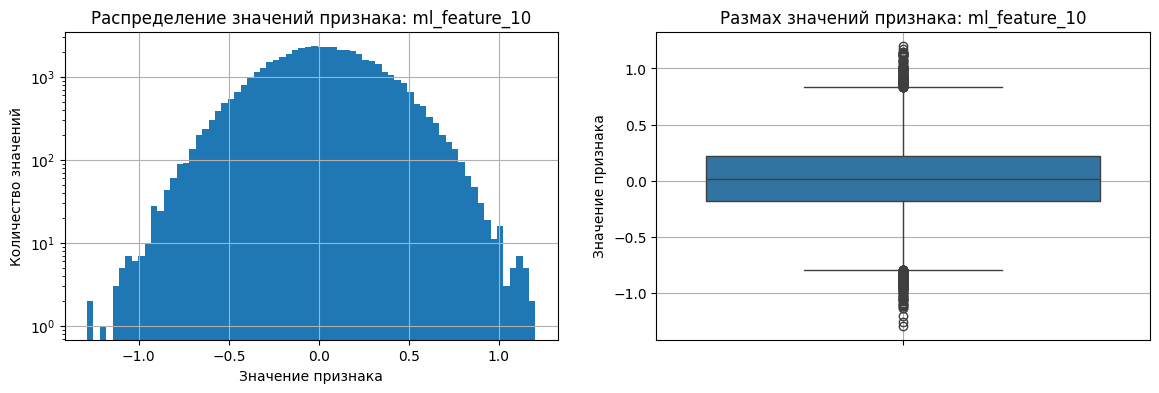

In [25]:
def get_emission_analysis(df):
    num_df = df.select_dtypes(include=['number'])
    
    for col in num_df.columns:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

        hist = axes[0]
        num_df[col].plot(
            kind='hist',
            bins=70,
            grid=True,
            ax=hist
        )

        hist.set_title(f'Распределение значений признака: {col}')
        hist.set_xlabel('Значение признака')
        hist.set_ylabel('Количество значений')
        hist.set_yscale('log')

        create_df_boxplot(num_df, col, axes[1])

        plt.show()
        
        plt.close()

interval_df = get_df_without_discrete(df_eda, discrete_cols)
get_emission_analysis(interval_df)

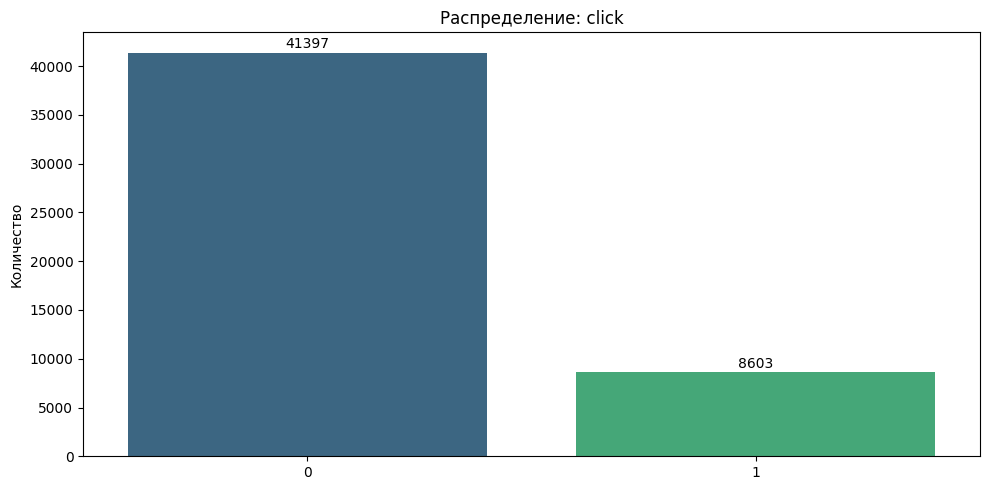

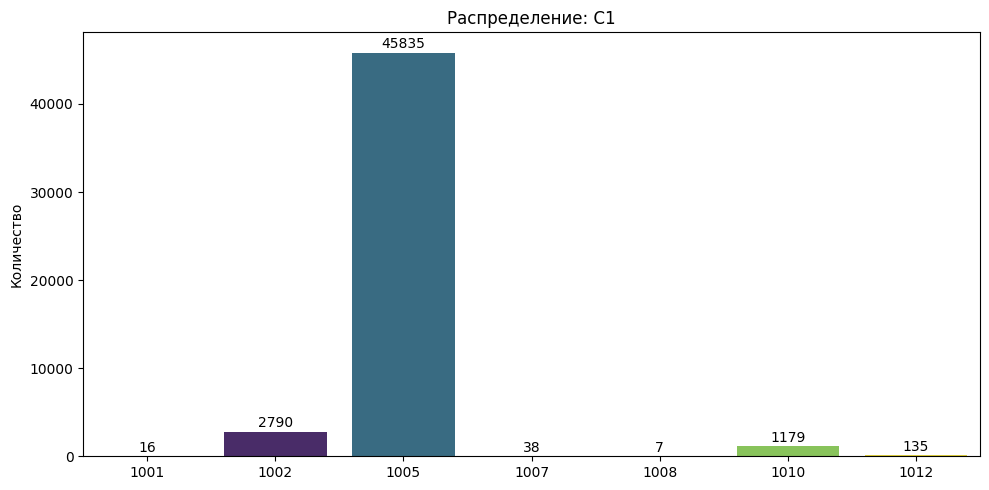

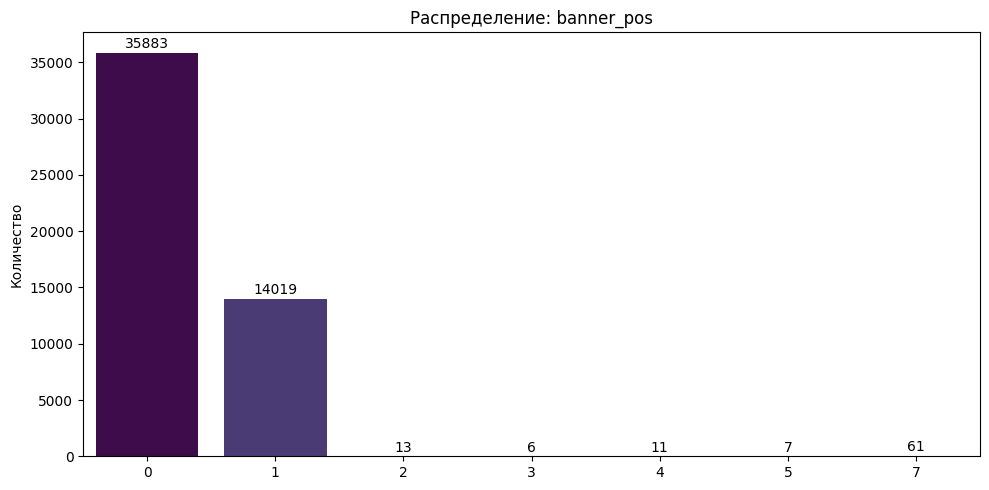

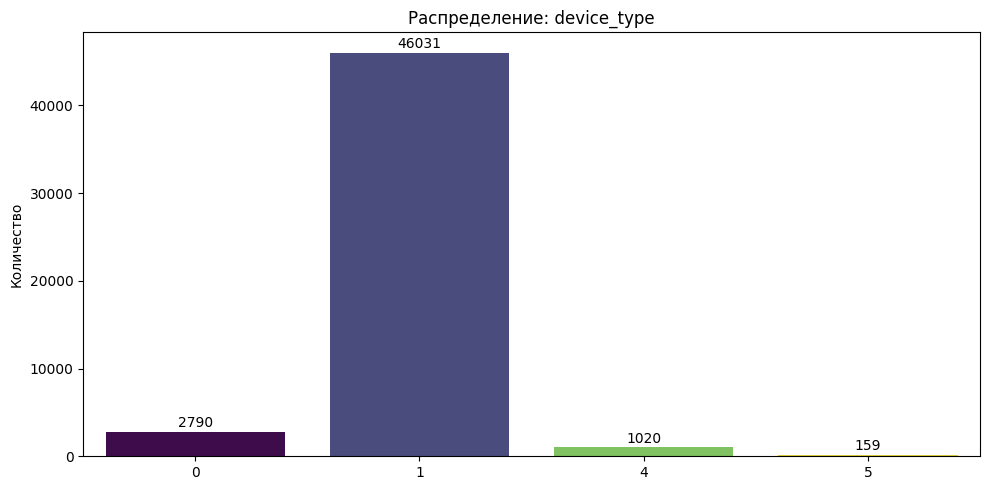

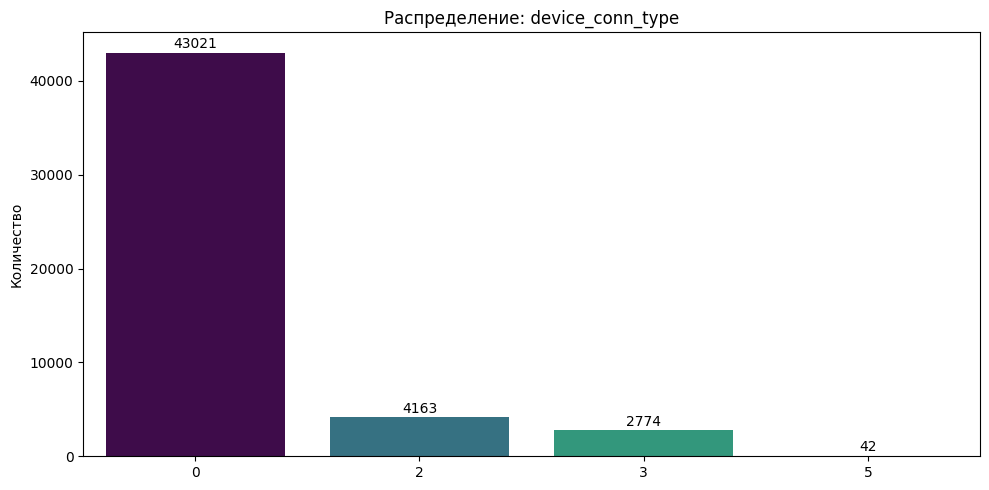

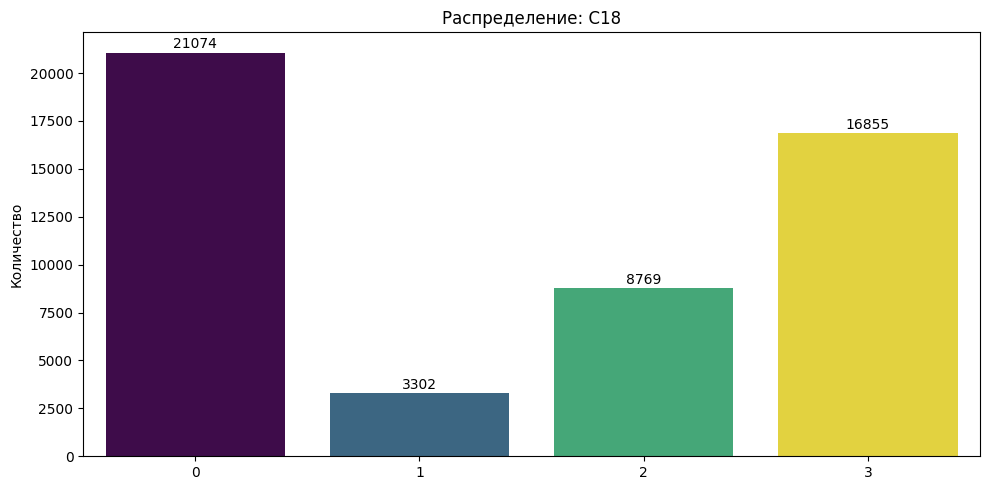

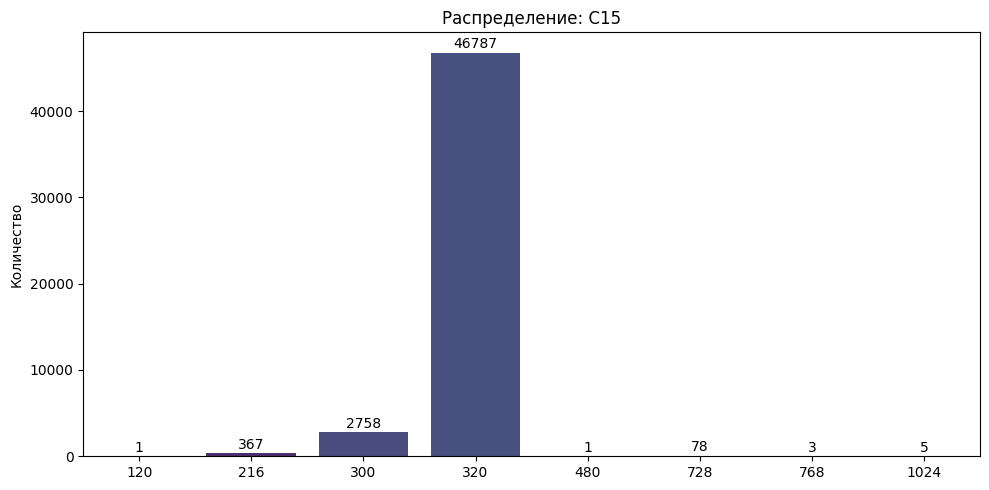

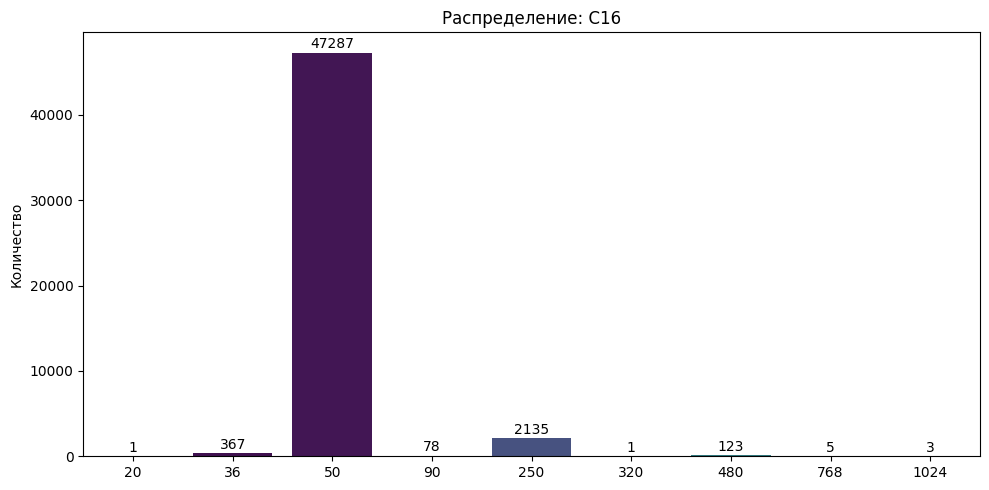

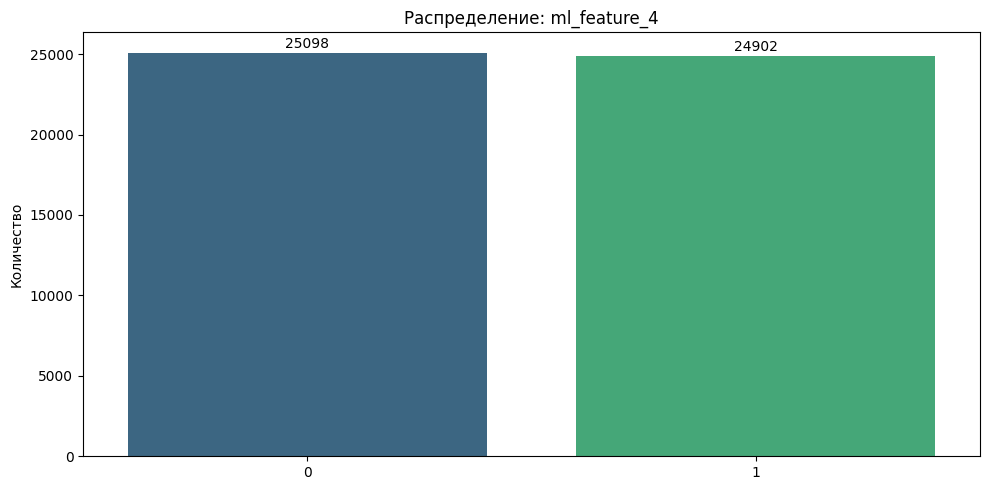

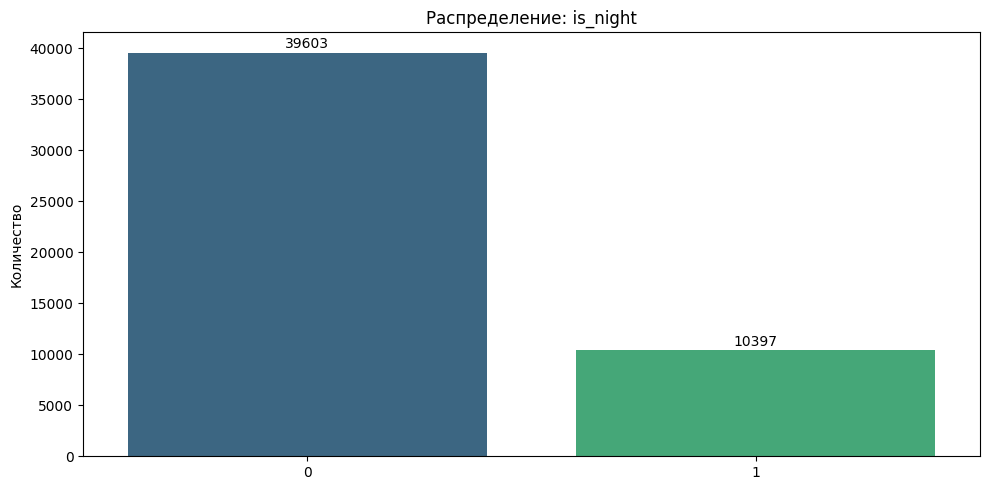

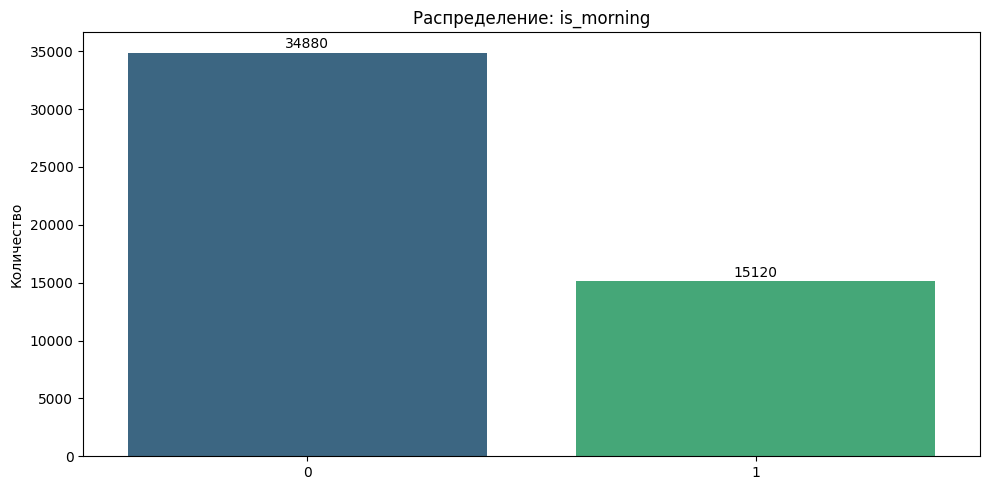

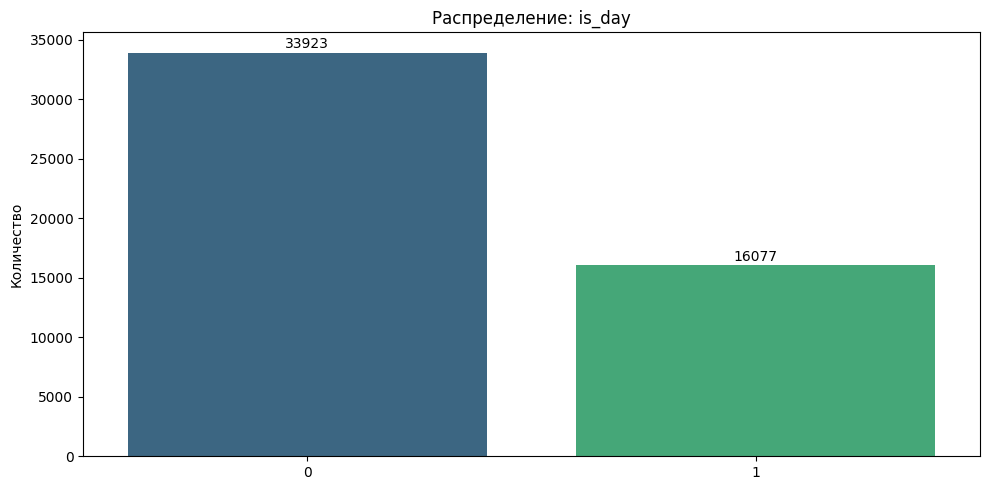

In [26]:
valid_features = [c for c in discrete_cols if c in df_eda.columns and c not in large_discrete_cols]

for _, feature in enumerate(valid_features):
    plt.figure(figsize=(10, 5)) 
    
    ax = sns.countplot(
        x=feature, 
        data=df_eda,
        hue=feature, 
        legend=False,
        palette='viridis'
    )
    
    plt.title(f'Распределение: {feature}')
    plt.xlabel('') # в title данная информация уже есть
    plt.ylabel('Количество')

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=1)

    plt.tight_layout()
    plt.show()
    
    plt.close()

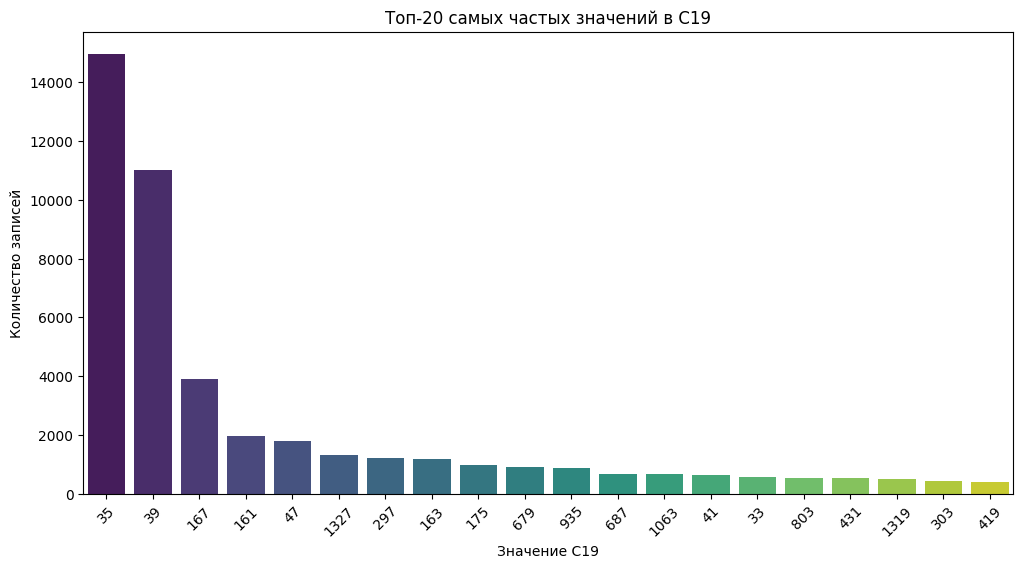

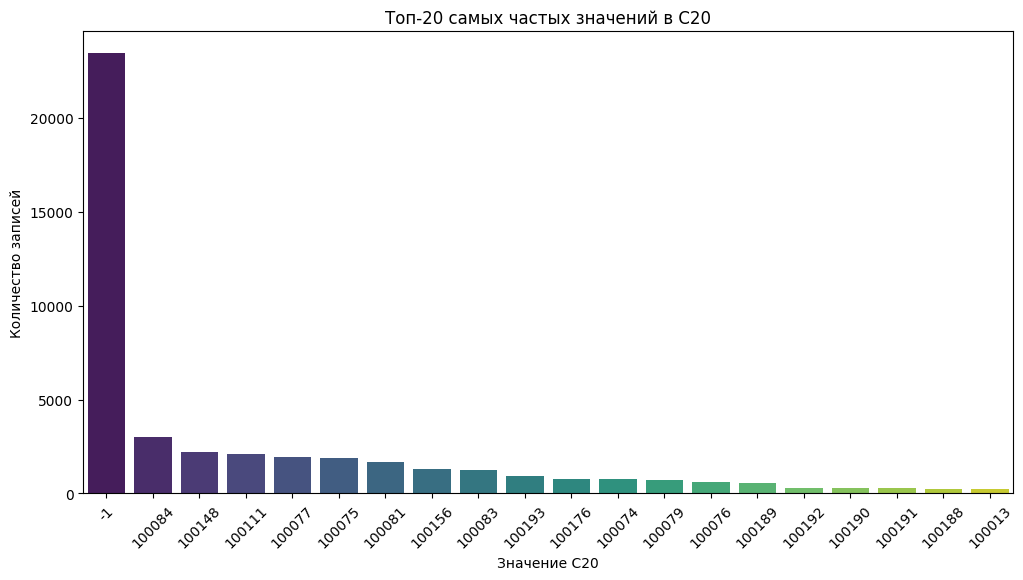

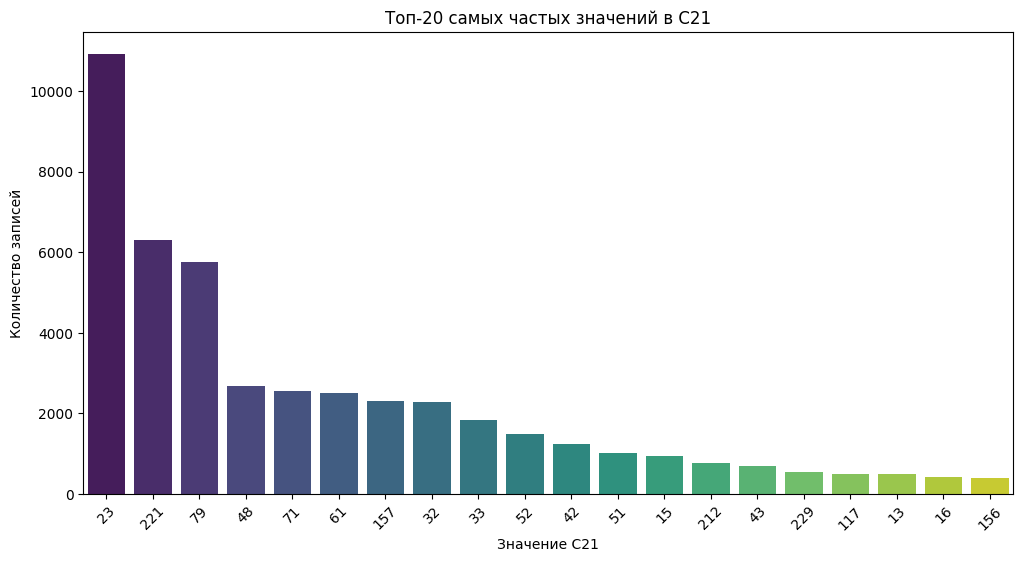

In [27]:
for col in large_discrete_cols:
    counts = df[col].value_counts().nlargest(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=counts.index.astype(str), 
        hue=counts.index.astype(str),
        y=counts.values, 
        palette='viridis', 
        legend=False
    )

    plt.title(f'Топ-20 самых частых значений в {col}')
    plt.xlabel(f'Значение {col}')
    plt.ylabel('Количество записей')
    plt.xticks(rotation=45)
    plt.show()

Числовые гистограммы можно поделить на 4 категории:

- ml_feature_1: Распределение нормальное, выбросы симметричные (есть и сверху, и снизу).

- C14: Распределение асимметричное, выбросы односторонние (хвост тянется вниз, к малым значениям).

- ml_feature_6: Распределение U-образное, выбросов нет (данные ограничены диапазоном [-1, 1]).

- ml_feature_8: Распределение равномерное, выбросов нет.


---

In [28]:
after = len(df_eda)
print(" Было строк в исходном датасете:", temp_len,
      '\n', "Осталось строк в датасете после обработки:", after,
      '\n', "Удалено строк в датасете после обработки:", temp_len-after,
      '\n', f"Процент потерь: {(temp_len-after)/temp_len*100:.2f}%")

 Было строк в исходном датасете: 50000 
 Осталось строк в датасете после обработки: 50000 
 Удалено строк в датасете после обработки: 0 
 Процент потерь: 0.00%


#### 2.7 Корреляции

<a id='12-bullet'></a>


Визуализация корреляций

In [29]:
def create_heatmap(corr, title, x, y_coef):
    num_rows = len(corr)
    dynamic_height = max(5, num_rows * y_coef) 
    plt.figure(figsize=(x, dynamic_height)) 
    
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5,
        cbar=False,
    )
    
    plt.title(title)

    plt.show()

Подсчет корреляции между обработанными признаками

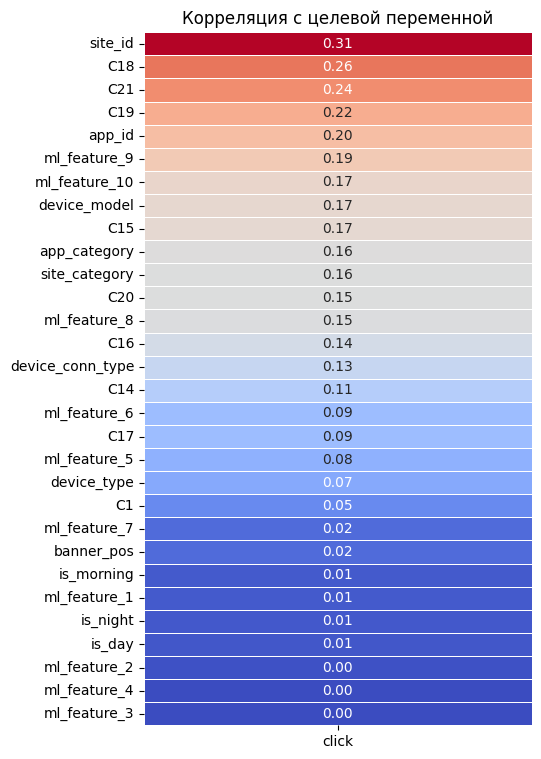

In [30]:
def select_str_top_100(df):
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if df[col].nunique() > 100:
            top_100 = df[col].value_counts().nlargest(100).index
            df[col] = df[col].where(df_eda[col].isin(top_100), 'other')
    return df

df_eda = select_str_top_100(df_eda)
valid_discrete = [c for c in discrete_cols if c in df_eda.columns]
df_eda[valid_discrete] = df_eda[valid_discrete].astype('category')

corr_matrix = df_eda.phik_matrix(njobs=4, interval_cols=['C14', 'C17', 'ml_feature_1', 'ml_feature_3', 'ml_feature_5', 'ml_feature_6', 'ml_feature_8', 'ml_feature_9', 'ml_feature_10'])
target_correlation = corr_matrix[corr_matrix.index != 'click'][['click']].sort_values(by='click', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной', x=5, y_coef=.3)

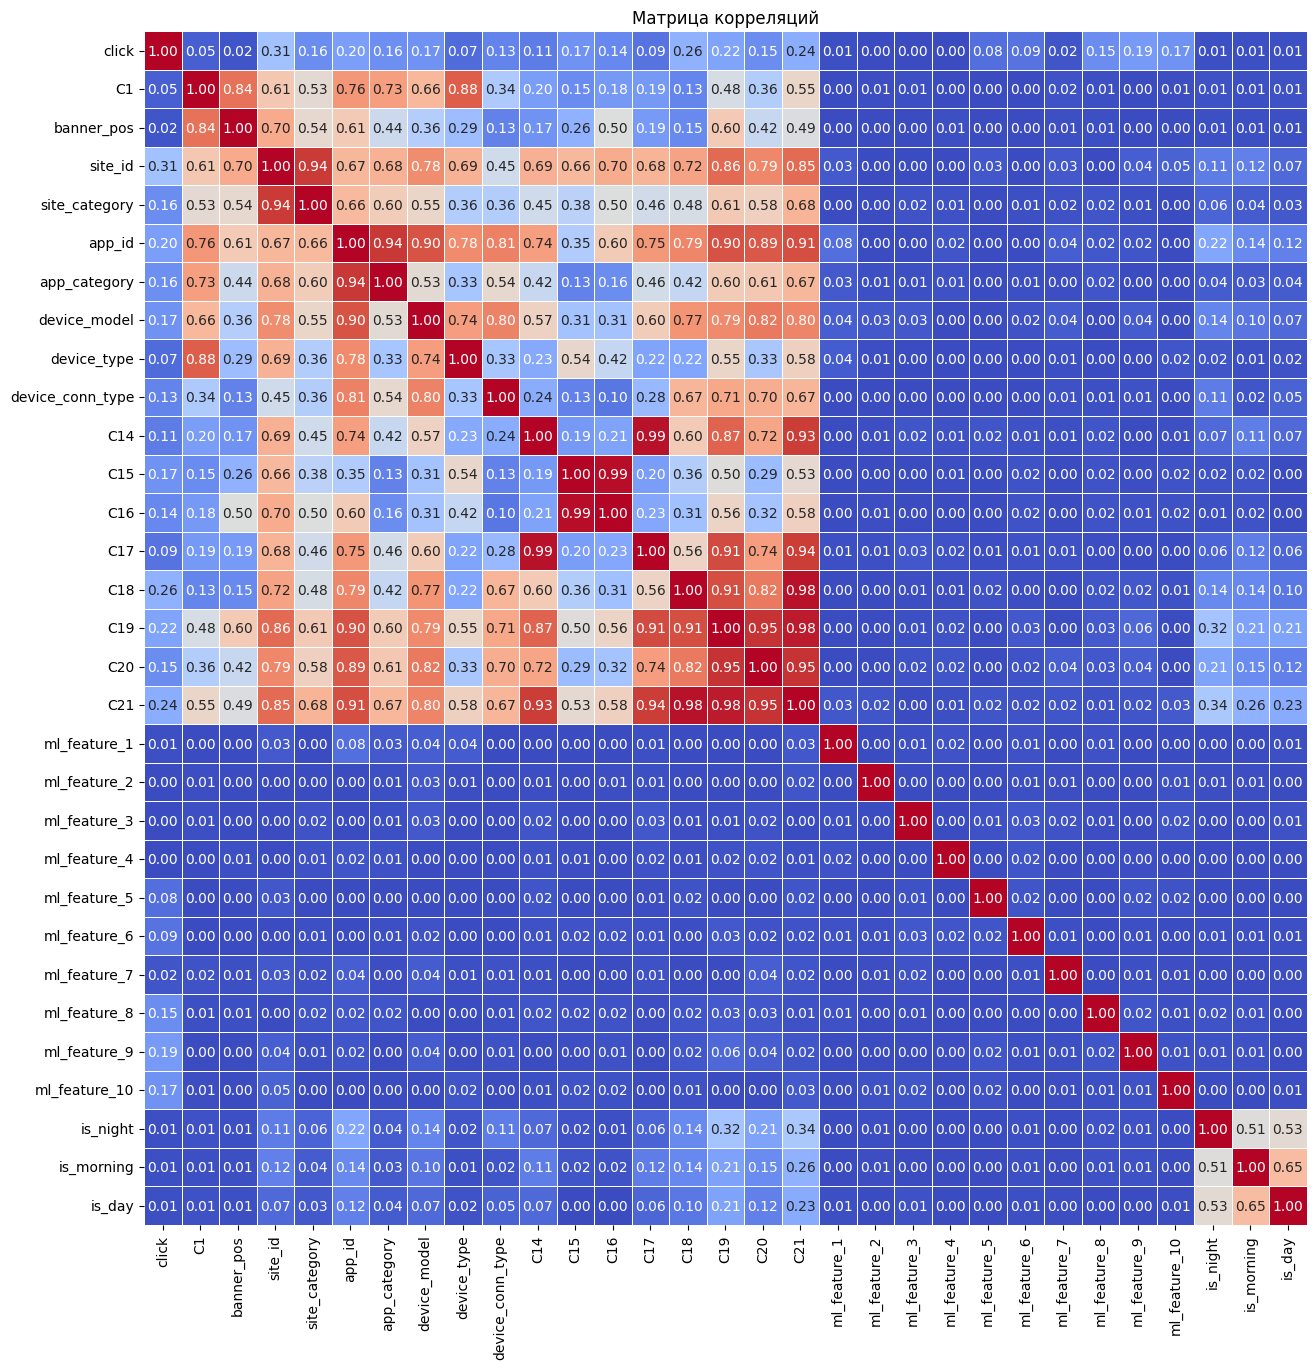

In [31]:
create_heatmap(corr_matrix, title='Матрица корреляций', x=15, y_coef=.5)

Результат анализа корреляций

Группы признаков, которые почти идентичны. Из двух стоит оставить только один, чтобы избежать нестабильности в модели.
- C14 и C17 (корреляция 0.99). (C14 корреляция с таргетом 0.11, C17 - 0.09)
- C15 и C16 (корреляция 0.99). (C15 корреляция с таргетом 0.17, C16 - 0.14)
- C18 и C19 (корреляция 0.91). (C18 корреляция с таргетом 0.26, C19 - 0.22)
- C20 и C21 (корреляция 1.00). (C20 корреляция с таргетом 0.15, C21 - 0.24)
- app_id и app_category (корреляция 0.94). (app_id корреляция с таргетом 0.20, app_category - 0.16)
- site_id и site_category (корреляция 0.94). (site_id корреляция с таргетом 0.31, site_category - 0.16)
Принцип, по которому будет происходить отбор признаков из двух: оставить тот, что лучше коррелирует с таргетом click.

Кроме того, некоторые признаки имеют Мультиколлинеарность сразу с несколькими признаками.
- C18 и C21 (корреляция 0.98)
- C14 и C21 (корреляция 0.93)
- app_id и C21 (корреляция 0.91)
- site_id и C21 (корреляция 0.85)
- app_id и device_model (корреляция 0.90)
- site_id и device_model (корреляция 0.78)
- C1 и device_type (корреляция 0.88)
- C1 и banner_pos (корреляция 0.84)

Признаки без корреляции с целевой переменной (корреляция 0.00):
- Признаки к удалению: ml_feature_2, ml_feature_3, ml_feature_4. Они исключаются из-за нулевой корреляции с целевой переменной. 

Признаки с низкой корреляцией (<0.1) оставлены, так как они могут вносить вклад в ансамбле с другими факторами. Финальную полезность таких признаков оценит встроенный отбор признаков модели.


In [32]:
add_useless_cols = ['C1', 'C17', 'C16', 'C19', 'C20', 'C21', 'app_category', 'site_category', 'device_model', 'ml_feature_2', 'ml_feature_3', 'ml_feature_4']

df_eda = df_eda.drop(columns=add_useless_cols)

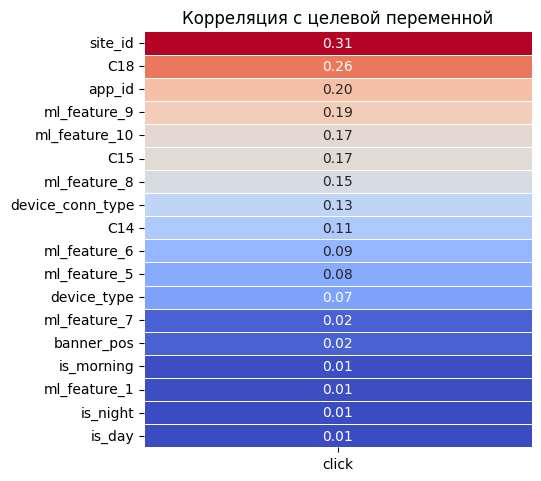

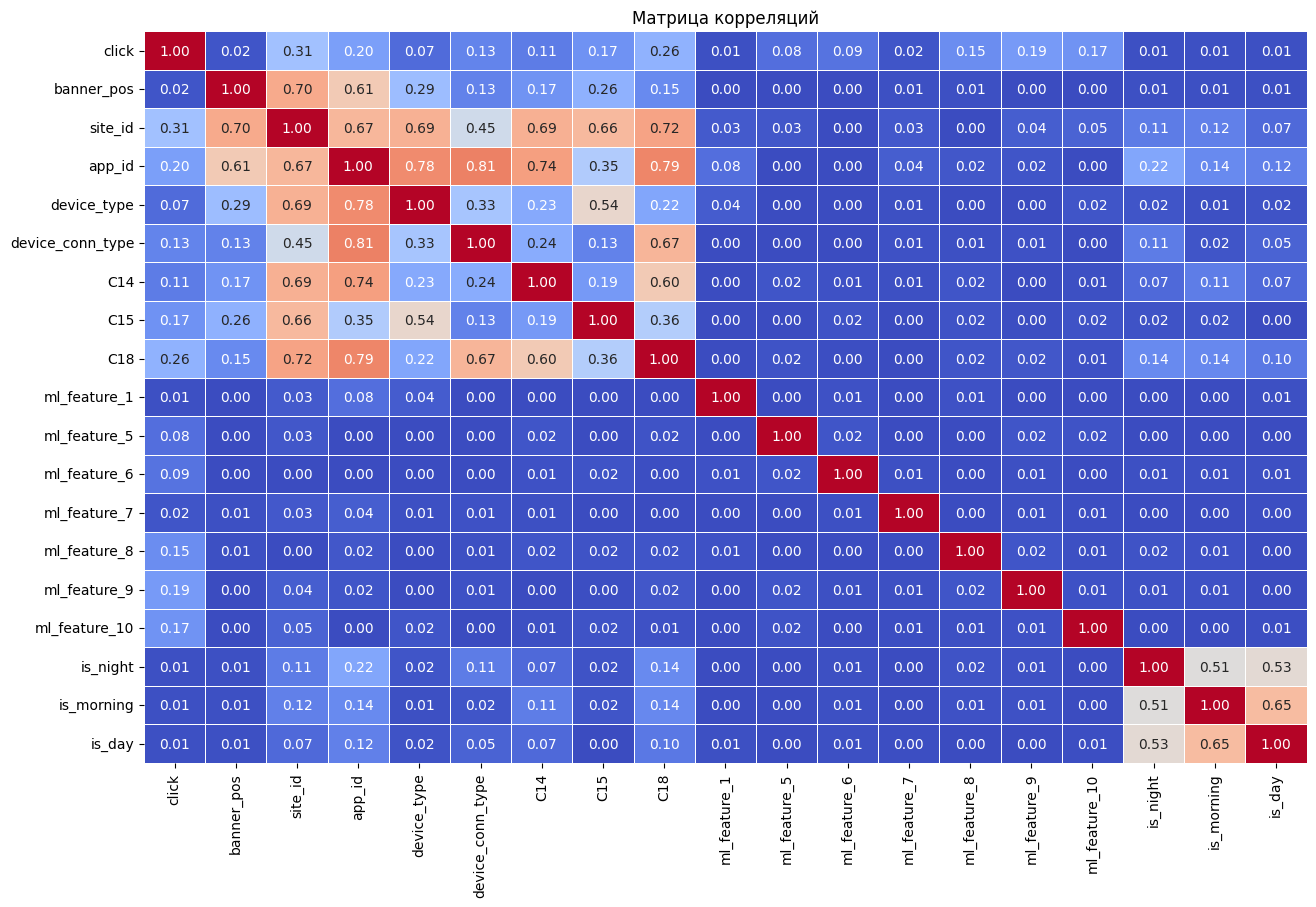

In [33]:
corr_matrix = df_eda.phik_matrix(njobs=4, interval_cols=['C14', 'ml_feature_1', 'ml_feature_5', 'ml_feature_6', 'ml_feature_8', 'ml_feature_9', 'ml_feature_10'])
target_correlation = corr_matrix[corr_matrix.index != 'click'][['click']].sort_values(by='click', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной', x=5, y_coef=.3)
create_heatmap(corr_matrix, title='Матрица корреляций', x=15, y_coef=.5)

#### 2.8 Выводы по EDA

<a id='13-bullet'></a>

Главное: В ходе анализа 50 000 записей рекламных показов данные проверены на качество (пропусков нет). Выявлены критические проблемы с мультиколлинеарностью и определены ключевые факторы влияния на клик.

Перспективные признаки:
- site_id (0.31) - лучший предиктор.

- C18 (0.26) - сильный анонимный признак (оставлен вместо дублей C19/C21).

- app_id (0.20) - важнее, чем категория или домен.

- ml_feature_9/10 - уникальный сигнал, независимый от остальных.

План действий:
- Удалить дубли: C1, C16, C17, C19, C20, C21, site/app_category, site/app_domain, device_model

- Удалить шум: id, device_id/ip, ml_feature_2/3/4.

- Обработка: hour - разбить на час и день недели. Категории кодировать через Target Encoding (из-за высокой кардинальности). Выбросы не трогать.


## 3. Разделение данных на выборки

#### 3.1 Разделение данных

<a id='14-bullet'></a>

In [34]:
df = df.drop(columns=add_useless_cols)

In [35]:
df.head()

,click,hour,banner_pos,site_id,app_id,device_type,device_conn_type,C14,C15,C18,ml_feature_1,ml_feature_5,ml_feature_6,ml_feature_7,ml_feature_8,ml_feature_9,ml_feature_10
0,1,14102100,1,d9750ee7,ecad2386,1,0,17614,320,2,-0.996823,0.817292,0.993275,Z,-0.619959,0.433666,0.274038
1,0,14102100,0,1fbe01fe,ecad2386,1,0,15701,320,0,-0.391309,-0.883865,-0.825722,X,0.576526,-0.318558,-0.132851
2,0,14102100,0,d9750ee7,ecad2386,1,0,17914,320,2,-2.112732,-0.859440,-0.338365,Y,-0.440047,-0.345412,0.340487
3,0,14102100,0,85f751fd,39cfef32,1,0,21611,320,3,0.332707,0.062795,0.062934,Y,0.551982,0.733382,-0.198542
4,0,14102100,0,1fbe01fe,ecad2386,1,0,15702,320,0,1.166623,-0.675276,0.797144,X,0.640827,0.297955,-0.136909


---

In [36]:
X = df.drop(columns='click')
y = df['click']

tts_params = {
    "shuffle": True,
    "random_state": RANDOM_SEED
}

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=.20,
    stratify=y,
    **tts_params
)


X_train_val, X_calib, y_train_val, y_calib = train_test_split(
    X_train_full,
    y_train_full,
    test_size=.25,
    stratify=y_train_full,
    **tts_params
)


#### 3.2 Проверка разделения

<a id='15-bullet'></a>

In [37]:
print(f"Размер обучающей выборки: {X_train_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер калибровочной выборки: {X_calib.shape}")
print(f"Доля положительного класса в train: {y_train_val.mean():.3f}")
print(f"Доля положительного класса в test: {y_test.mean():.3f}")
print(f"Доля положительного класса в calib: {y_calib.shape}")

Размер обучающей выборки: (30000, 16)
Размер тестовой выборки: (10000, 16)
Размер калибровочной выборки: (10000, 16)
Доля положительного класса в train: 0.172
Доля положительного класса в test: 0.172
Доля положительного класса в calib: (10000,)


## 4. Предобработка данных - построение пайплайнов

#### 4.1 Объединение пайплайнов для предобработки данных

<a id='16-bullet'></a>

In [38]:
all_num_cols = X.select_dtypes(include=['number']).columns
all_cat_cols = X.select_dtypes(include=['object']).columns

num_col_exc = ['hour']
num_cols = [col for col in all_num_cols if col not in num_col_exc]

ohe_cat_cols = ['ml_feature_7']
target_cat_cols = [col for col in all_cat_cols if col not in ohe_cat_cols]

In [39]:
def extract_date_features(X):
    X = X.copy()
    if 'hour' in X.columns:
        X['datetime'] = pd.to_datetime(X['hour'], format='%y%m%d%H')
        h = X['datetime'].dt.hour
        
        X['is_night'] = (h < 6).astype(int)
        X['is_morning'] = ((h >= 6) & (h < 12)).astype(int)
        X['is_day'] = ((h >= 12) & (h < 18)).astype(int)
        
        X = X.drop(columns=['hour', 'datetime'])
    return X

def get_date_feature_names(transformer, input_features):
    return ['is_night', 'is_morning', 'is_day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('stand', StandardScaler())]), num_cols),
        ('date_processing', make_pipeline(
            FunctionTransformer(extract_date_features, validate=False, feature_names_out=get_date_feature_names), 
            StandardScaler()
        ), num_col_exc),
        ('ohe_cat', Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse_output=False))]), ohe_cat_cols),
        ('target_cat', Pipeline(steps=[('target', TargetEncoder())]), target_cat_cols),
    ], 
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [40]:
X_transformed = preprocessor.fit_transform(X_train_val, y_train_val)
X_transformed.head()

,banner_pos,device_type,device_conn_type,C14,C15,C18,ml_feature_1,ml_feature_5,ml_feature_6,ml_feature_8,ml_feature_9,ml_feature_10,is_night,is_morning,is_day,ml_feature_7_Y,ml_feature_7_Z,site_id,app_id
39098,-0.555153,-0.035607,3.099554,0.791236,0.059075,1.189877,1.809886,-0.146378,-1.161040,-1.482654,1.095272,1.463837,-0.507385,-0.660790,-0.689886,0.0,0.0,0.120227,0.143163
25148,-0.555153,-0.035607,-0.389058,0.330201,0.059075,1.189877,0.606522,0.116444,-1.142856,-0.819760,-0.390257,-1.738337,1.970889,-0.660790,-0.689886,0.0,1.0,0.120227,0.081467
26276,-0.555153,-0.035607,3.099554,0.474149,0.059075,-0.318014,0.255902,-0.744071,-0.503014,-1.092564,0.684940,-0.585724,-0.507385,1.513339,-0.689886,0.0,1.0,0.120227,0.020084
23927,-0.555153,-1.880531,-0.389058,-2.470836,0.059075,0.435931,0.253193,-0.582191,0.197887,-1.390982,0.957167,0.113176,-0.507385,-0.660790,-0.689886,0.0,1.0,0.149679,0.200966
17255,-0.555153,-0.035607,-0.389058,-0.630321,0.059075,-1.071960,-1.469993,0.052462,-1.548148,1.583615,0.964963,0.437954,1.970889,-0.660790,-0.689886,0.0,1.0,0.205607,0.200966


## 5. Отбор признаков

<a id='17-bullet'></a>

In [41]:
lr_estimator = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED, class_weight='balanced')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('var_thresh', VarianceThreshold(threshold=0.001)),
    ('correlation_filter', SelectKBest(score_func=f_classif, k='all')),
    ('rfe', RFE(estimator=lr_estimator, n_features_to_select=.8, step=2)),
    

    ('model', LogisticRegression(random_state=RANDOM_SEED, class_weight='balanced'))
])

In [42]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

## 6. Обучение базовой модели

<a id='18-bullet'></a>

In [43]:
def create_PR_curve_graph(y_true, y_proba, score, name='Модель'):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR-кривая (AUC = {score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall кривая: {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [44]:
def thresh_calc(y, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y, y_proba)

    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

    best_idx = np.argmax(f1_scores[:-1])
    best_thresh = thresholds[best_idx]

    print(f"Оптимальный порог: {best_thresh:.4f}")
    print(f"Максимальный F1-score: {f1_scores[best_idx]:.4f}")

    return (y_proba >= best_thresh).astype(int)

def evaluate_model(pipeline, X, y, cv, name="Model", is_pred_proba=True):
    results = cross_validate(
        pipeline, 
        X, 
        y, 
        cv=cv, 
        scoring=["average_precision"],
        return_estimator=True,
        n_jobs=4,
    )
    score = results["test_average_precision"].mean()
    print(f"[{name}] PR-AUC: {score:.4f}")
    
    if is_pred_proba:
        y_proba = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]    
        create_PR_curve_graph(y, y_proba, score, name)

        y_pred = thresh_calc(y, y_proba)

        print("Результаты на тесте с новым порогом")
        print(classification_report(y, y_pred, zero_division=0))    

        print("Матрица ошибок")
        print(confusion_matrix(y, y_pred))

### 6.1 Обучение `DummyClassifier`

<a id='19-bullet'></a>

[Dummy Baseline] PR-AUC: 0.1721


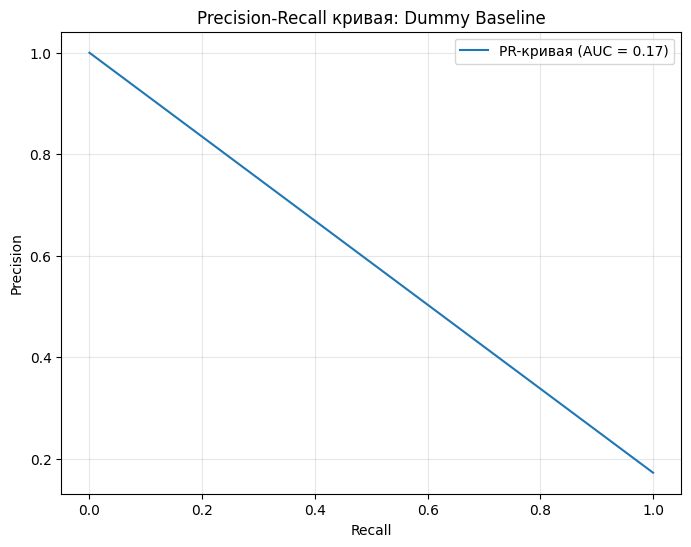

Оптимальный порог: 0.0000
Максимальный F1-score: 0.2936
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24838
           1       0.17      1.00      0.29      5162

    accuracy                           0.17     30000
   macro avg       0.09      0.50      0.15     30000
weighted avg       0.03      0.17      0.05     30000

Матрица ошибок
[[    0 24838]
 [    0  5162]]


In [45]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_SEED)
evaluate_model(baseline, X_train_val, y_train_val, cv, name="Dummy Baseline")

### 6.2 Обучение `LogisticRegression`

<a id='20-bullet'></a>

[Logistic Regression] PR-AUC: 0.4053


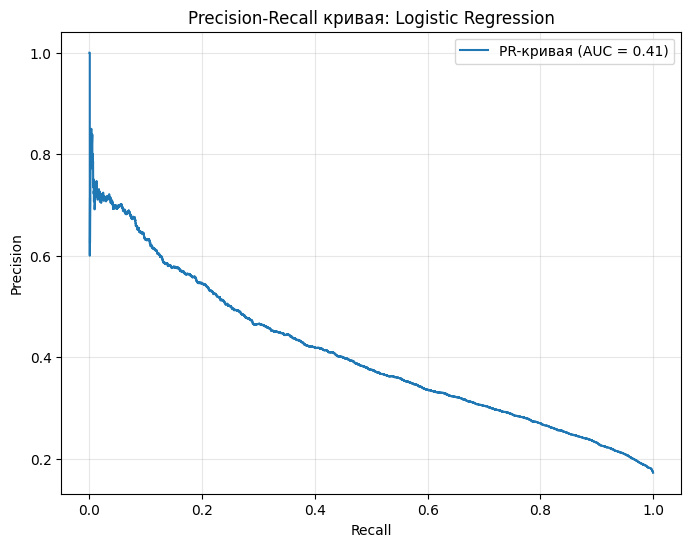

Оптимальный порог: 0.5793
Максимальный F1-score: 0.4346
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     24838
           1       0.36      0.55      0.43      5162

    accuracy                           0.75     30000
   macro avg       0.63      0.67      0.64     30000
weighted avg       0.80      0.75      0.77     30000

Матрица ошибок
[[19726  5112]
 [ 2310  2852]]


In [46]:
evaluate_model(pipeline, X_train_val, y_train_val, cv, name="Logistic Regression")

### 6.3 Обучение `SVC`

<a id='21-bullet'></a>

In [47]:
pipeline.set_params(model=SVC(kernel='linear', probability=False, random_state=RANDOM_SEED))
evaluate_model(pipeline, X_train_val[:20000], y_train_val[:20000], cv, name="SVC", is_pred_proba=False)

/Users/katsay/develop/ml/venv/lib/python3.14/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[SVC] PR-AUC: 0.3538


### 6.4 Сравнение моделей

<a id='22-bullet'></a>

1. Модель успешно проходит проверку на адекватность.

PR-AUC логистической регрессии (0.3213) почти вдвое превышает результат бейзлайна (0.1720), который просто предсказывает всем объектам класс 1.​ В отличие от Dummy, который дает 100% ложных срабатываний на отрицательных примерах, регрессия корректно определила 23007 негативных кейсов (True Negatives), подняв Precision с 0.17 до 0.28.​

2. Логистическая регрессия оказалась значительно эффективнее и стабильнее SVC. 

Метод опорных векторов показал результат, близкий к случайному (PR-AUC 0.22). Logistic Regression обеспечивает лучший баланс между полнотой и точностью (максимальный F1-score 0.38 против 0.30 у SVC).


## 7. Подбор гиперпараметров: Grid Search с кросс-валидацией

#### 7.1 Определение сетки гиперпараметров

<a id='23-bullet'></a>

In [48]:
param_grid = [
    {
        'model': [LogisticRegression(
            random_state=RANDOM_SEED, 
            solver='saga', 
            class_weight='balanced', 
            max_iter=2000,
        )],
        'model__l1_ratio': [0.1, 0.5, 1],
        'model__C': [0.05, 0.1, 0.5],
    },
    {
        'model': [LinearSVC(
            random_state=RANDOM_SEED, 
            dual=False, 
            class_weight='balanced', 
        )],
        'model__C': [0.001, 0.01, 0.02, 0.05],
        'model__penalty': ['l1', 'l2']
    },
]

#### 7.2 Применение Grid Search

<a id='24-bullet'></a>

In [49]:

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='average_precision',
    n_jobs=5,
    verbose=1,
    return_train_score=False
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train_val, y_train_val)

Начинаем подбор гиперпараметров...
Fitting 5 folds for each of 17 candidates, totalling 85 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model': [LogisticRegre...solver='saga')], 'model__C': [0.05, 0.1, ...], 'model__l1_ratio': [0.1, 0.5, ...]}, {'model': [LinearSVC(cla...ndom_state=42)], 'model__C': [0.001, 0.01, ...], 'model__penalty': ['l1', 'l2']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'average_precision'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",5
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuff

#### 7.3 Таблица результатов

<a id='25-bullet'></a>

In [50]:
results_df = pd.DataFrame(grid_search.cv_results_)

results_df['Model'] = results_df['param_model'].apply(lambda x: x.__class__.__name__)

def format_params(params):
    return ", ".join(
        f"{key.replace('model__', '')}={val}" 
        for key, val in params.items() 
        if key != 'model'
    )

results_df['Params'] = results_df['params'].apply(format_params)

columns_to_show = [
    'Model', 
    'Params', 
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]

results_table = results_df[columns_to_show].sort_values(by='rank_test_score')
results_table.columns = ['Model', 'Hyperparameters', 'PR-AUC', 'Std Dev', 'Rank']

print("Топ-10 лучших моделей:")
pd.set_option('display.max_colwidth', None)
results_table.head(10)

Топ-10 лучших моделей:


,Model,Hyperparameters,PR-AUC,Std Dev,Rank
14,LinearSVC,"C=0.02, penalty=l2",0.406267,0.007430,1
3,LogisticRegression,"C=0.1, l1_ratio=0.1",0.406072,0.007537,2
11,LinearSVC,"C=0.01, penalty=l1",0.406059,0.007628,3
13,LinearSVC,"C=0.02, penalty=l1",0.406052,0.007614,4
12,LinearSVC,"C=0.01, penalty=l2",0.406038,0.007178,5
16,LinearSVC,"C=0.05, penalty=l2",0.406010,0.007546,6
15,LinearSVC,"C=0.05, penalty=l1",0.405926,0.007525,7
4,LogisticRegression,"C=0.1, l1_ratio=0.5",0.405891,0.007809,8
1,LogisticRegression,"C=0.05, l1_ratio=0.5",0.405769,0.007508,9
2,LogisticRegression,"C=0.05, l1_ratio=1",0.405742,0.007949,10


## 8. Финальная модель

#### 8.1 Обучение финальной модели

<a id='26-bullet'></a>

In [51]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат валидации (PR-AUC): {grid_search.best_score_:.4f}")

Лучшие параметры: {'model': LinearSVC(class_weight='balanced', dual=False, random_state=42), 'model__C': 0.02, 'model__penalty': 'l2'}
Лучший результат валидации (PR-AUC): 0.4063


---

In [52]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor = lines[0].get_color(), alpha=0.2)

In [53]:
def show_learning_curve(best_model, df, y):
    N_train, learn_train, learn_test = learning_curve(
        best_model,
        df,
        y,
        cv=cv,
        shuffle=True,
        random_state=RANDOM_SEED
    )
    plot_with_err(N_train, learn_train, label='training scores')
    plot_with_err(N_train, learn_test, label='validation scores')
    plt.xlabel('Размер датасета')
    plt.ylabel('Метрика')
    plt.legend()
    
    plt.show()

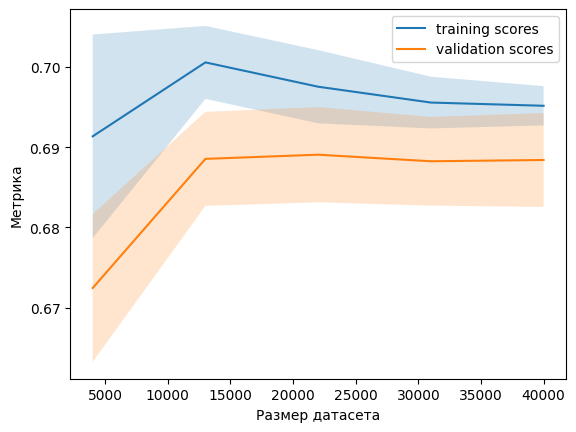

In [54]:
best_model = grid_search.best_estimator_
X = df.drop(columns='click')
y = df['click']

show_learning_curve(best_model, X, y)

#### 8.2 Посчет метрики на тестовой выборке

<a id='27-bullet'></a>

In [55]:

def final_check(best_model, X_test, y_test):
    y_proba = best_model.decision_function(X_test)

    score = average_precision_score(y_test, y_proba)
    print(f"PR-AUC: {score:.4f}")
    
    create_PR_curve_graph(y_test, y_proba, score)
    y_pred = thresh_calc(y_test, y_proba)

    print("Результаты на тесте с новым порогом")
    print(classification_report(y_test, y_pred))

    print("Матрица ошибок")
    print(confusion_matrix(y_test, y_pred))
    
    return y_proba

PR-AUC: 0.3973


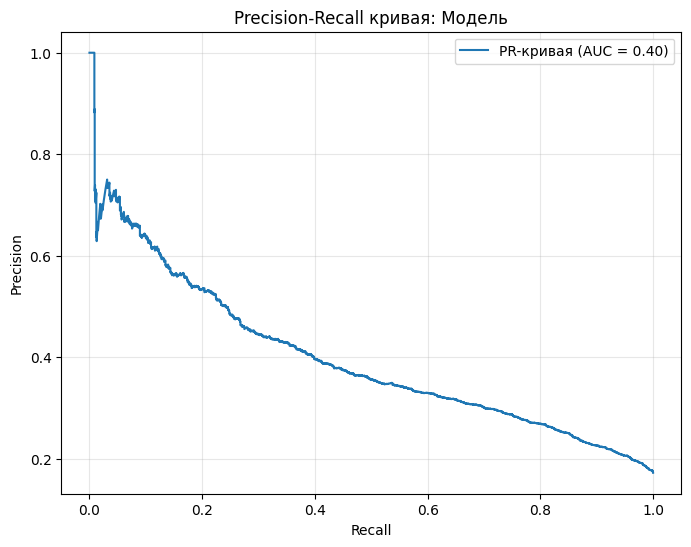

Оптимальный порог: 0.0449
Максимальный F1-score: 0.4269
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      8279
           1       0.33      0.61      0.43      1721

    accuracy                           0.72     10000
   macro avg       0.61      0.68      0.62     10000
weighted avg       0.80      0.72      0.75     10000

Матрица ошибок
[[6120 2159]
 [ 668 1053]]

Оценка Бриера: 0.2139


In [56]:
y_proba = final_check(best_model, X_test, y_test)

prob_pos = 1 / (1 + np.exp(-y_proba))
score = brier_score_loss(y_test, prob_pos)
print(f"\nОценка Бриера: {score:.4f}")

#### 8.3 Анализ весов модели

<a id='28-bullet'></a>

In [57]:
coefs_list = []

model = best_model[-1] 

feature_names = best_model[:-1].get_feature_names_out()

weights = model.coef_[0]

coefs_list.append(pd.Series(weights, index=feature_names))

df_coefs = pd.DataFrame(coefs_list).mean(axis=0).to_frame(name="Важность")

df_coefs['Важность по модолю'] = df_coefs['Важность'].abs()

importance_df = df_coefs.sort_values(by='Важность по модолю', ascending=False)

print("Топ-5 наиболее влиятельных признаков")
display(importance_df.head(5))

print("Топ-5 наименее влиятельных признаков")
display(importance_df.tail(5))

Топ-5 наиболее влиятельных признаков


,Важность,Важность по модолю
app_id,2.767450,2.767450
site_id,2.285911,2.285911
ml_feature_9,0.165299,0.165299
ml_feature_10,0.142282,0.142282
ml_feature_8,0.087337,0.087337


Топ-5 наименее влиятельных признаков


,Важность,Важность по модолю
is_night,0.020284,0.020284
ml_feature_7_Y,-0.017730,0.017730
is_morning,0.014023,0.014023
banner_pos,-0.003544,0.003544
device_type,0.001216,0.001216


1. Наблюдается колоссальный разрыв в важности между идентификаторами сайтов или приложений и остальными признаками. app_id (2.53) и site_id (2.18) являются абсолютными предикторами. Это указывает на то, что контекст показа (где именно пользователь видит рекламу) играет решающую роль.

2. Синтетические признаки времени суток (is_day, is_night, is_morning) оказались в хвосте рейтинга с весами около 0.02. Это подтверждает гипотезу, что для данной выборки само по себе время показа не является сильным сигналом.

3. Признаки banner_pos (позиция баннера) и device_type (тип устройства) имеют веса, близкие к нулю (< 0.003). Модель практически игнорирует их при принятии решений.

4. Сгенерированные признаки (ml_feature_9, ml_feature_10) имеют умеренную значимость (0.14–0.17), занимая второе место после идентификаторов площадок. Они помогают уточнить прогноз, но не являются определяющими.

## 9. Калибровка модели

#### 9.1 Проверка текущей калибровки

<a id='29-bullet'></a>

In [58]:
columns = ['Статус калибровки', 'Оценка Бриера', 'Оценка ECE', 'Оценка MCE']
calib_metrics = []

In [59]:
def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    ece = 0
    n = len(y_true)
    for i, (bin_lower, bin_upper) in enumerate(zip(bins[:-1], bins[1:])):
        if i == n_bins - 1:
            mask = (y_prob >= bin_lower) & (y_prob <= bin_upper)
        else:
            mask = (y_prob >= bin_lower) & (y_prob < bin_upper)
        if np.sum(mask) > 0:
            bin_conf = np.mean(y_prob[mask])
            bin_acc = np.mean(y_true[mask])
            ece += np.abs(bin_conf - bin_acc) * np.sum(mask)
    return ece / n

def calculate_mce(y_true, y_prob, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    max_error = 0
    for i, (bin_lower, bin_upper) in enumerate(zip(bins[:-1], bins[1:])):
        if i == n_bins - 1:
            mask = (y_prob >= bin_lower) & (y_prob <= bin_upper)
        else:
            mask = (y_prob >= bin_lower) & (y_prob < bin_upper)
        if np.sum(mask) > 0:
            bin_conf = np.mean(y_prob[mask])
            bin_acc = np.mean(y_true[mask])
            max_error = max(max_error, np.abs(bin_conf - bin_acc)) 
    return max_error

PR-AUC: 0.4207


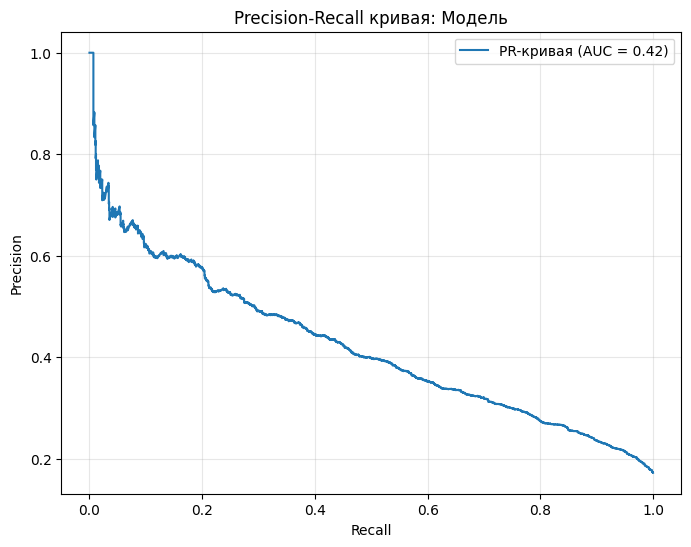

Оптимальный порог: 0.1514
Максимальный F1-score: 0.4503
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      8280
           1       0.39      0.53      0.45      1720

    accuracy                           0.78     10000
   macro avg       0.64      0.68      0.66     10000
weighted avg       0.81      0.78      0.79     10000

Матрица ошибок
[[6865 1415]
 [ 809  911]]


In [60]:
y_proba = final_check(best_model, X_calib, y_calib)

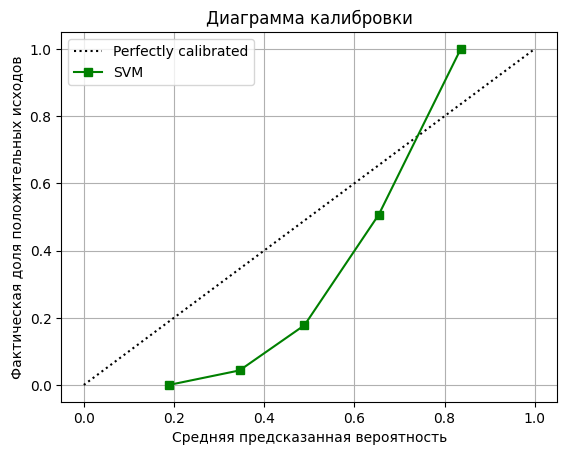


Оценка Бриера: 0.2113

Оценка ECE: 0.2935

Оценка MCE: 0.3318


In [61]:
def sigmoid_numpy(x):
    return 1 / (1 + np.exp(-x))

sigmoid_y_proba = sigmoid_numpy(y_proba)

def show_calibration_curve(y_test, y_proba):
    prob_true_svm, prob_pred_svm = calibration_curve(y_test, y_proba)

    CalibrationDisplay(prob_true_svm, prob_pred_svm, y_test).plot(label='SVM', color='green')
    plt.title("Диаграмма калибровки")
    plt.xlabel("Средняя предсказанная вероятность")
    plt.ylabel("Фактическая доля положительных исходов")
    plt.legend()
    plt.grid(True)
    plt.show()
    
show_calibration_curve(y_calib, sigmoid_y_proba)

brier_score = brier_score_loss(y_calib, sigmoid_y_proba)
print(f"\nОценка Бриера: {brier_score:.4f}")

ece_score = calculate_ece(y_calib, sigmoid_y_proba)
print(f"\nОценка ECE: {ece_score:.4f}")

mce_score = calculate_mce(y_calib, sigmoid_y_proba)
print(f"\nОценка MCE: {mce_score:.4f}")

calib_metrics.append(['До калибровки', brier_score, ece_score, mce_score])

#### 9.2 Применение метода калибровки

<a id='30-bullet'></a>

In [62]:
calibrated = CalibratedClassifierCV(
    estimator=best_model,
    method='sigmoid',
    cv=5
)
calibrated.fit(X_calib, y_calib)

,"estimator estimator: estimator instance, default=NoneThe classifier whose output need to be calibrated to provide moreaccurate `predict_proba` outputs. The default classifier isa :class:`~sklearn.svm.LinearSVC`... versionadded:: 1.2",Pipeline(step...m_state=42))])
,"method method: {'sigmoid', 'isotonic', 'temperature'}, default='sigmoid'The method to use for calibration. Can be:- 'sigmoid', which corresponds to Platt's method (i.e. a binary logistic regression model).- 'isotonic', which is a non-parametric approach.- 'temperature', temperature scaling.Sigmoid and isotonic calibration methods natively support only binaryclassifiers and extend to multi-class classification using a One-vs-Rest (OvR)strategy with post-hoc renormalization, i.e., adjusting the probabilities aftercalibration to ensure they sum up to 1.In contrast, temperature scaling naturally supports multi-class calibration byapplying `softmax(classifier_logits/T)` with a value of `T` (temperature)that optimizes the log loss.For very uncalibrated classifiers on very imbalanced datasets, sigmoidcalibration might be preferred because it fits an additional interceptparameter. This helps shift decision boundaries appropriately when theclassifier being calibrated is biased towards the majority class.Isotonic calibration is not recommended when the number of calibration samplesis too low ``(≪1000)`` since it then tends to overfit... versionchanged:: 1.8 Added option 'temperature'.",'sigmoid'
,"cv cv: int, cross-validation generator, or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If ``y`` isneither binary nor multiclass, :class:`~sklearn.model_selection.KFold`is used.Refer to the :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors.Base estimator clones are fitted in parallel across cross-validationiterations.See :term:`Glossary ` for more details... versionadded:: 0.24",None
,"ensemble ensemble: bool, or ""auto"", default=""auto""Determines how the calibrator is fitted.""auto"" will use `False` if the `estimator` is a:class:`~sklearn.frozen.FrozenEstimator`, and `True` otherwise.If `True`, the `estimator` is fitted using training data, andcalibrated using testing data, for each `cv` fold. The final estimatoris an ensemble of `n_cv` fitted classifier and calibrator pairs, where`n_cv` is the number of cross-validation folds. The output is theaverage predicted probabilities of all pairs.If `False`, `cv` is used to compute unbiased predictions, via:func:`~sklearn.model_selection.cross_val_predict`, which are thenused for calibration. At prediction time, the classifier used is the`estimator` trained on all the data.Note that this method is also internally implemented in:mod:`sklearn.svm` estimators with the `probabilities=True` parameter... versionadded:: 0.24.. versionchanged:: 1.6 `""auto""` option is added and is the default.",'auto'
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the colum

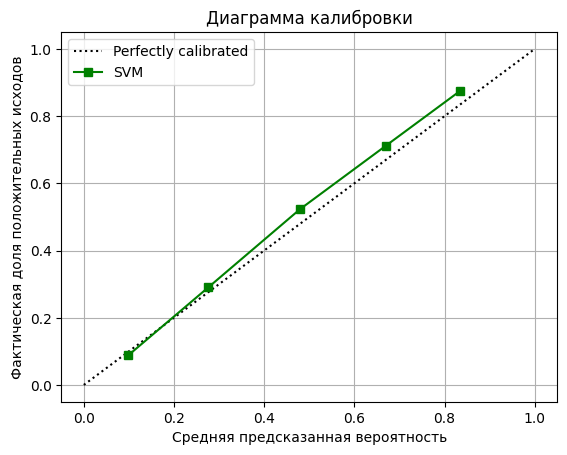


Оценка Бриера: 0.1200

Оценка ECE: 0.0140

Оценка MCE: 0.0700


In [63]:
y_proba = calibrated.predict_proba(X_calib)[:, 1]

show_calibration_curve(y_calib, y_proba)

brier_score = brier_score_loss(y_calib, y_proba)
print(f"\nОценка Бриера: {brier_score:.4f}")

ece_score = calculate_ece(y_calib, y_proba)
print(f"\nОценка ECE: {ece_score:.4f}")

mce_score = calculate_mce(y_calib, y_proba)
print(f"\nОценка MCE: {mce_score:.4f}")

calib_metrics.append(['После калибровки', brier_score, ece_score, mce_score])

## 10. Оценка качества калибровки

#### 10.1 Сравнение модели до и после калибровки

<a id='31-bullet'></a>

In [64]:
pd.DataFrame(calib_metrics, columns=columns)

,Статус калибровки,Оценка Бриера,Оценка ECE,Оценка MCE
0,До калибровки,0.211318,0.293493,0.331805
1,После калибровки,0.119979,0.014012,0.070009


Сигмоидная калибровка существенно повысила качество вероятностных оценок модели, устранив значительное смещение прогнозов. Показатель средней ошибки калибровки (ECE) снизился с 0.3709 до 0.0140, а оценка Бриера улучшилась с 0.2710 до 0.1200, что свидетельствует о высокой точности ранжирования. На итоговом графике кривая практически совпадает с идеальной диагональю, подтверждая, что предсказанные вероятности теперь соответствуют реальной частоте наступления целевого события.

## 11. Финальный отчёт и выводы

### 11.1 Сведение результатов в таблицу

<a id='32-bullet'></a>


In [65]:
metrics_data = {
    "Метрика": [
        "PR-AUC",
        "Presicion (класс 1)",  
        "Recall (класс 1)", 
        "F1-Score", 
        "Brier Score", 
        "Expected Calibration Error (ECE)", 
        "Max Calibration Error (MCE)"
    ],
    "Dummy Baseline (train)": [0.1720, 0.17, 1.00, 0.29, "-", "-", "-"],
    "SVM (test)": [0.3973, 0.33, 0.61, 0.43, "-", "-", "-"],
    "SVM (До калибровки) (calib)": [0.4207, 0.39, 0.53, 0.45, 0.27, 0.37, 0.39],
    "SVM (После калибровки) (calib)": [0.4207, 0.39, 0.53, 0.45, 0.12, 0.01, 0.07]
}

df_metrics = pd.DataFrame(metrics_data)

features_data = {
    "Признак": ["app_id", "site_id", "ml_feature_9", "ml_feature_10", "ml_feature_7_Z"],
    "Вес (Importance)": [2.5298, 2.1770, 0.1673, 0.1412, 0.0897]
}

df_features = pd.DataFrame(features_data)

print("Сводная таблица метрик")
display(df_metrics)

print("\nТоп-5 важных признаков")
display(df_features)

Сводная таблица метрик


,Метрика,Dummy Baseline (train),SVM (test),SVM (До калибровки) (calib),SVM (После калибровки) (calib)
0,PR-AUC,0.172,0.3973,0.4207,0.4207
1,Presicion (класс 1),0.17,0.33,0.3900,0.3900
2,Recall (класс 1),1.0,0.61,0.5300,0.5300
3,F1-Score,0.29,0.43,0.4500,0.4500
4,Brier Score,-,-,0.2700,0.1200
5,Expected Calibration Error (ECE),-,-,0.3700,0.0100
6,Max Calibration Error (MCE),-,-,0.3900,0.0700



Топ-5 важных признаков


,Признак,Вес (Importance)
0,app_id,2.5298
1,site_id,2.1770
2,ml_feature_9,0.1673
3,ml_feature_10,0.1412
4,ml_feature_7_Z,0.0897


### 11.2 Выводы

<a id='33-bullet'></a>

1. Качество значительно улучшилось. Финальная модель (SVM) достигла PR-AUC 0.40, что почти в 2.5 раза выше показателя Dummy Baseline (0.17). F1-Score вырос с 0.29 до 0.43, что подтверждает реальную способность модели разделять классы, а не просто угадывать мажоритарный класс.​

2. Важные признаки: вероятность клика критически зависит от идентификаторов площадок: app_id (вес 2.53) и site_id (вес 2.18). Их вклад на порядок превышает влияние любых других факторов, включая сгенерированные ML-признаки (ml_feature_9, ml_feature_10), которые играют лишь вспомогательную роль.​

3. Калибровка: до калибровки модель была ненадежной (ECE 37%). После применения калибровки она стала высокоточной: средняя ошибка вероятности (ECE) снизилась до 1%, а Brier Score упал с 0.27 до 0.12. Теперь предсказанным вероятностям можно доверять.​

4. Готовность к продакшену: модель готова к использованию. Она демонстрирует стабильное превосходство над случайным гаданием, обладает отличной калибровкой и опирается на понятные признаки. Однако высокая зависимость всего от двух признаков (app_id, site_id) создает риск: для новых приложений/сайтов качество прогноза может резко упасть.

### 11.3 Рекомендации

<a id='34-bullet'></a>

1. Первое и самое важное ограничение модели: слишком большая зависимость от конкретных id сайтов или приложений, если придет новый сайт или приложение, модель не сможет дать точный прогноз. 
- Главное ограничение текущей модели - критическая зависимость от app_id и site_id (веса > 2.0). Если в системе появится новый сайт или приложение, модель не сможет дать точный прогноз, так как не видела этот ID при обучении.
- Попытка заменить id на общие категории (site_category, app_category) сейчас приводит к падению качества (PR-AUC снижается с 0.40 до 0.35) из-за низкой корреляции категорий с целевой переменной.
- Чтобы перейти на использование категорий, нужно повысить корреляцию. Здесь может помочь более сильное разбиение на подкатегории. Возможно, стоит добавить тематики сайтов, как дополнительный признак для дополнительной замены id.

2. Смена архитектуры модели. Самый быстрый и вероятный прирост качества даст переход на CatBoost/LightGBM.

3. Расширение данных. 
- Текущий набор признаков ограничен. Обогащение данных информацией о пользователе (пол, возраст, интересы) или контексте показа (геолокация, тип соединения) могло бы повысить точность, снизив зависимость только от площадки показа.

## 12. Сохранение модели для продакшена

### 12.1 Сохранение артефактов

<a id='35-bullet'></a>

In [66]:
file_name = 'click_prediction.joblib'

metadata = {
    'model_version': '1.0.0',
    'training_date': '2026-01-01',
    'pr_auc': 0.4,
    'python_version': sys.version,
    'sklearn_version': sklearn.__version__,
    'pandas_version': pd.__version__,
    'numpy_version': np.__version__,
    'useless_cols': useless_cols + add_useless_cols,
    'threshold': 0.0449
}

joblib.dump({
    'model': calibrated,
    'metadata': metadata
}, file_name)

print(f"Объект сохранён в файл {file_name}") 

Объект сохранён в файл click_prediction.joblib


### 12.2 Проверка работоспособности кода

<a id='36-bullet'></a>

In [67]:
class ClickModelService:
    def __init__(self, model_path):
        self.model = joblib.load(model_path)
    
    def predict_churn(self, X):
        metadata = self.model['metadata']
        X = X.drop(columns=metadata['useless_cols'])
    
        probs = self.model['model'].predict_proba(X)[:, 1]
        predictions = (probs >= metadata['threshold']).astype(int)

        return predictions, probs

In [68]:
row_idx = 0
sample = original_df.iloc[[row_idx]].copy()

test = sample.drop(columns=['click'])

service = ClickModelService(file_name)
is_click, score = service.predict_churn(test)

print(f"Клик по рекламе произойдёт: {'Да' if is_click else 'Нет'}")
print(f'Уверенность в ответе: {round(score[0] * 100)}%')

Клик по рекламе произойдёт: Да
Уверенность в ответе: 44%
